<a href="https://colab.research.google.com/github/Zhmuda/methane_project/blob/main/startpart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подключение библиотек

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!wget https://data.mendeley.com/public-files/datasets/yd7vw4c5mk/files/d049ad25-53cc-4ead-bde0-4c9c6a181528/file_downloaded
!unzip file_downloaded

--2024-05-15 09:27:29--  https://data.mendeley.com/public-files/datasets/yd7vw4c5mk/files/d049ad25-53cc-4ead-bde0-4c9c6a181528/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/0e352185-b81e-46f3-bec0-9e51d08e5f82 [following]
--2024-05-15 09:27:29--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/0e352185-b81e-46f3-bec0-9e51d08e5f82
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.40.216, 3.5.70.250, 52.218.116.146, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.40.216|:4

__Чтение датасета__

In [15]:
dataset_raw = pd.read_csv('./methane_data.csv')

In [16]:
dataset_raw.shape

(9199930, 34)

Описание датасета инструментами pandas

In [17]:
dataset_raw.head()

year  month  day  hour  minute  second  AN311  AN422  AN423  TP1721  ...  \
0  2014      3    2     0       0       0    3.2    1.6    1.4    24.7  ...   
1  2014      3    2     0       0       1    3.2    1.6    1.4    24.7  ...   
2  2014      3    2     0       0       2    3.2    1.6    1.4    24.7  ...   
3  2014      3    2     0       0       3    3.2    1.6    1.4    24.7  ...   
4  2014      3    2     0       0       4    3.2    1.6    1.4    24.7  ...   

   P_864  TC862  WM868  AMP1_IR  AMP2_IR  DMP3_IR  DMP4_IR  AMP5_IR  F_SIDE  \
0    0.0    0.0    0.0      5.0      4.0      6.0      4.0      0.0     0.0   
1    0.0    0.0    0.0      5.0      4.0      5.0      4.0      0.0     0.0   
2    0.0    0.0    0.0      5.0      5.0      5.0      4.0      0.0     0.0   
3    0.0    0.0    0.0      5.0      5.0      5.0      4.0      0.0     0.0   
4    0.0    0.0    0.0      5.0      5.0      5.0      4.0      0.0     0.0   

     V  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 34 columns]

In [18]:
dataset_raw.describe()

year         month           day          hour        minute  \
count  9199930.0  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06   
mean      2014.0  4.301335e+00  1.486756e+01  1.147565e+01  2.949708e+01   
std          0.0  1.031884e+00  8.713892e+00  6.920225e+00  1.731798e+01   
min       2014.0  3.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%       2014.0  3.000000e+00  7.000000e+00  5.000000e+00  1.400000e+01   
50%       2014.0  4.000000e+00  1.400000e+01  1.100000e+01  2.900000e+01   
75%       2014.0  5.000000e+00  2.200000e+01  1.700000e+01  4.400000e+01   
max       2014.0  6.000000e+00  3.100000e+01  2.300000e+01  5.900000e+01   

             second         AN311         AN422         AN423        TP1721  \
count  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06   
mean   2.949997e+01  3.483730e+00  1.654854e+00  1.497736e+00  2.547688e+01   
std    1.731811e+01  6.105680e-01  1.282543e-01  3.304544e-01  9.320548e-01   
min    0.000000e+00 -2.660000e+02  0.000000e+00 -2.400000e+00  0.000000e+00   
25%    1.400000e+01  3.300000e+00  1.600000e+00  1.400000e+00  2.470000e+01   
50%    2.900000e+01  3.600000e+00  1.600000e+00  1.400000e+00  2.540000e+01   
75%    4.400000e+01  3.800000e+00  1.700000e+00  1.500000e+00  2.610000e+01   
max    5.900000e+01  5.000000e+00  2.400000e+00  5.300000e+00  2.790000e+01   

       ...         P_864         TC862         WM868       AMP1_IR  \
count  ...  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06   
mean   ...  8.696697e+01  2.989809e+01  1.802531e+00  5.853846e+00   
std    ...  2.915783e+01  9.898455e+00  1.319706e+00  2.441276e+01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00 -2.550000e+02   
25%    ...  9.340000e+01  3.240000e+01  5.000000e-02  0.000000e+00   
50%    ...  9.420000e+01  3.290000e+01  2.200000e+00  0.000000e+00   
75%    ...  9.570000e+01  3.350000e+01  2.790000e+00  0.000000e+00   
max    ...  4.354000e+02  4.050000e+01  6.390000e+00  9.880000e+02   

            AMP2_IR       DMP3_IR       DMP4_IR       AMP5_IR        F_SIDE  \
count  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06   
mean   5.741290e+00  4.200591e+00  3.969738e+00  4.143130e-01  9.374555e-02   
std    2.425026e+01  1.734187e+01  1.731265e+01  1.096601e+01  2.914651e-01   
min   -2.550000e+02 -2.550000e+02 -2.550000e+02 -2.550000e+02  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.009000e+03  2.160000e+02  1.980000e+02  1.210000e+02  1.000000e+00   

                  V  
count  9.199930e+06  
mean   1.346978e+00  
std    5.996678e+00  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+02  

[8 rows x 34 columns]

__Проверка на наличие значений null не требуется, отсутствие таких значений - гарантия авторов датасета__

__Проверка на выход датчиков за границы диапазона__
При обнаружении такой аномалии, принимаем значение равное ближайшему внутри допустимого интервала

In [19]:
dataset_raw.loc[dataset_raw['AN311'] < -5, 'AN311'] = -5
dataset_raw.loc[dataset_raw['AN311'] > 5, 'AN311'] = 5
dataset_raw.loc[dataset_raw['AN422'] < -5, 'AN422'] = -5
dataset_raw.loc[dataset_raw['AN422'] > 5, 'AN422'] = 5
dataset_raw.loc[dataset_raw['AN423'] < -5, 'AN423'] = -5
dataset_raw.loc[dataset_raw['AN423'] > 5, 'AN423'] = 5

In [20]:
dataset_raw.describe()

year         month           day          hour        minute  \
count  9199930.0  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06   
mean      2014.0  4.301335e+00  1.486756e+01  1.147565e+01  2.949708e+01   
std          0.0  1.031884e+00  8.713892e+00  6.920225e+00  1.731798e+01   
min       2014.0  3.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%       2014.0  3.000000e+00  7.000000e+00  5.000000e+00  1.400000e+01   
50%       2014.0  4.000000e+00  1.400000e+01  1.100000e+01  2.900000e+01   
75%       2014.0  5.000000e+00  2.200000e+01  1.700000e+01  4.400000e+01   
max       2014.0  6.000000e+00  3.100000e+01  2.300000e+01  5.900000e+01   

             second         AN311         AN422         AN423        TP1721  \
count  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06   
mean   2.949997e+01  3.483957e+00  1.654854e+00  1.497733e+00  2.547688e+01   
std    1.731811e+01  5.565967e-01  1.282543e-01  3.304174e-01  9.320548e-01   
min    0.000000e+00 -5.000000e+00  0.000000e+00 -2.400000e+00  0.000000e+00   
25%    1.400000e+01  3.300000e+00  1.600000e+00  1.400000e+00  2.470000e+01   
50%    2.900000e+01  3.600000e+00  1.600000e+00  1.400000e+00  2.540000e+01   
75%    4.400000e+01  3.800000e+00  1.700000e+00  1.500000e+00  2.610000e+01   
max    5.900000e+01  5.000000e+00  2.400000e+00  5.000000e+00  2.790000e+01   

       ...         P_864         TC862         WM868       AMP1_IR  \
count  ...  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06   
mean   ...  8.696697e+01  2.989809e+01  1.802531e+00  5.853846e+00   
std    ...  2.915783e+01  9.898455e+00  1.319706e+00  2.441276e+01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00 -2.550000e+02   
25%    ...  9.340000e+01  3.240000e+01  5.000000e-02  0.000000e+00   
50%    ...  9.420000e+01  3.290000e+01  2.200000e+00  0.000000e+00   
75%    ...  9.570000e+01  3.350000e+01  2.790000e+00  0.000000e+00   
max    ...  4.354000e+02  4.050000e+01  6.390000e+00  9.880000e+02   

            AMP2_IR       DMP3_IR       DMP4_IR       AMP5_IR        F_SIDE  \
count  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06  9.199930e+06   
mean   5.741290e+00  4.200591e+00  3.969738e+00  4.143130e-01  9.374555e-02   
std    2.425026e+01  1.734187e+01  1.731265e+01  1.096601e+01  2.914651e-01   
min   -2.550000e+02 -2.550000e+02 -2.550000e+02 -2.550000e+02  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.009000e+03  2.160000e+02  1.980000e+02  1.210000e+02  1.000000e+00   

                  V  
count  9.199930e+06  
mean   1.346978e+00  
std    5.996678e+00  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+02  

[8 rows x 34 columns]

In [21]:
dataset_raw.columns

Index(['year', 'month', 'day', 'hour', 'minute', 'second', 'AN311', 'AN422',
       'AN423', 'TP1721', 'RH1722', 'BA1723', 'TP1711', 'RH1712', 'BA1713',
       'MM252', 'MM261', 'MM262', 'MM263', 'MM264', 'MM256', 'MM211', 'CM861',
       'CR863', 'P_864', 'TC862', 'WM868', 'AMP1_IR', 'AMP2_IR', 'DMP3_IR',
       'DMP4_IR', 'AMP5_IR', 'F_SIDE', 'V'],
      dtype='object')

Обработка категориального признака (направление движения)

In [22]:
dataset_raw['F_SIDE_RIGHT'] = np.where(dataset_raw['F_SIDE'] < 1, 1, 0)

In [23]:
columns = ['AN311', 'AN422', 'AN423',
           'TP1721', 'RH1722', 'BA1723', 'TP1711', 'RH1712', 'BA1713', 'MM252',
           'MM261', 'MM262', 'MM263', 'MM264', 'MM256', 'MM211', 'CM861', 'CR863',
           'P_864', 'TC862', 'WM868', 'AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR',
           'AMP5_IR', 'F_SIDE_RIGHT', 'V']

In [24]:
dataset = dataset_raw[columns]
dataset_raw.drop(dataset_raw.index, inplace=True)

In [25]:
dataset.shape

(9199930, 28)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.api import SimpleExpSmoothing

In [27]:
dataset.columns.values

array(['AN311', 'AN422', 'AN423', 'TP1721', 'RH1722', 'BA1723', 'TP1711',
       'RH1712', 'BA1713', 'MM252', 'MM261', 'MM262', 'MM263', 'MM264',
       'MM256', 'MM211', 'CM861', 'CR863', 'P_864', 'TC862', 'WM868',
       'AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR', 'AMP5_IR',
       'F_SIDE_RIGHT', 'V'], dtype=object)

Сдвиг таргета на 15 минут (15 * 60 = 900 секунд)

# MM263

In [ ]:
dataset_MM263 = dataset.copy()
dataset_MM263.loc[:, 'MM263_future'] = dataset_MM263['MM263']
dataset_MM263['MM263_future'] = dataset_MM263['MM263_future'].shift(-900)

dataset_MM263 = dataset_MM263.dropna()
print(dataset_MM263.shape, dataset.shape)

(9199030, 29) (9199930, 28)


In [ ]:
features_MM263 = dataset_MM263[
    ['AN311', 'AN422', 'AN423', 'TP1721', 'RH1722', 'BA1723', 'TP1711',
     'RH1712', 'BA1713', 'MM252', 'MM261', 'MM262', 'MM263', 'MM264',
     'MM256', 'MM211', 'CM861', 'CR863', 'P_864', 'TC862', 'WM868',
     'AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR', 'AMP5_IR',
     'F_SIDE_RIGHT', 'V']]

for column in ['AN311', 'AN422', 'AN423', 'TP1721', 'RH1722', 'BA1723', 'TP1711',
     'RH1712', 'BA1713', 'MM252', 'MM261', 'MM262', 'MM263', 'MM264',
     'MM256', 'MM211', 'CM861', 'CR863', 'P_864', 'TC862', 'WM868',
     'AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR', 'AMP5_IR', 'V']:
    features_MM263.loc[:, column] = SimpleExpSmoothing(features_MM263[column], initialization_method="heuristic").fit(smoothing_level=0.001, optimized=False).fittedvalues

target_MM263 = SimpleExpSmoothing(dataset_MM263['MM263_future'], initialization_method="heuristic").fit(smoothing_level=0.001, optimized=False).fittedvalues



X_train_MM263, X_test_MM263, y_train_MM263, y_test_MM263 = train_test_split(features_MM263, target_MM263, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_MM263_scaled = scaler.fit_transform(X_train_MM263)
X_test_MM263_scaled = scaler.transform(X_test_MM263)

/var/folders/d7/ms8g932s0mngjxsjc18fvb480000gn/T/ipykernel_43627/2387176344.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_MM263.loc[:, column] = SimpleExpSmoothing(features_MM263[column], initialization_method="heuristic").fit(smoothing_level=0.001, optimized=False).fittedvalues
/var/folders/d7/ms8g932s0mngjxsjc18fvb480000gn/T/ipykernel_43627/2387176344.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_MM263.loc[:, column] = SimpleExpSmoothing(features_MM263[column], initializati

In [ ]:
smoothed = SimpleExpSmoothing(dataset['MM263'], initialization_method="heuristic").fit(smoothing_level=0.1, optimized=False).fittedvalues
unsmoothed = dataset['MM263']

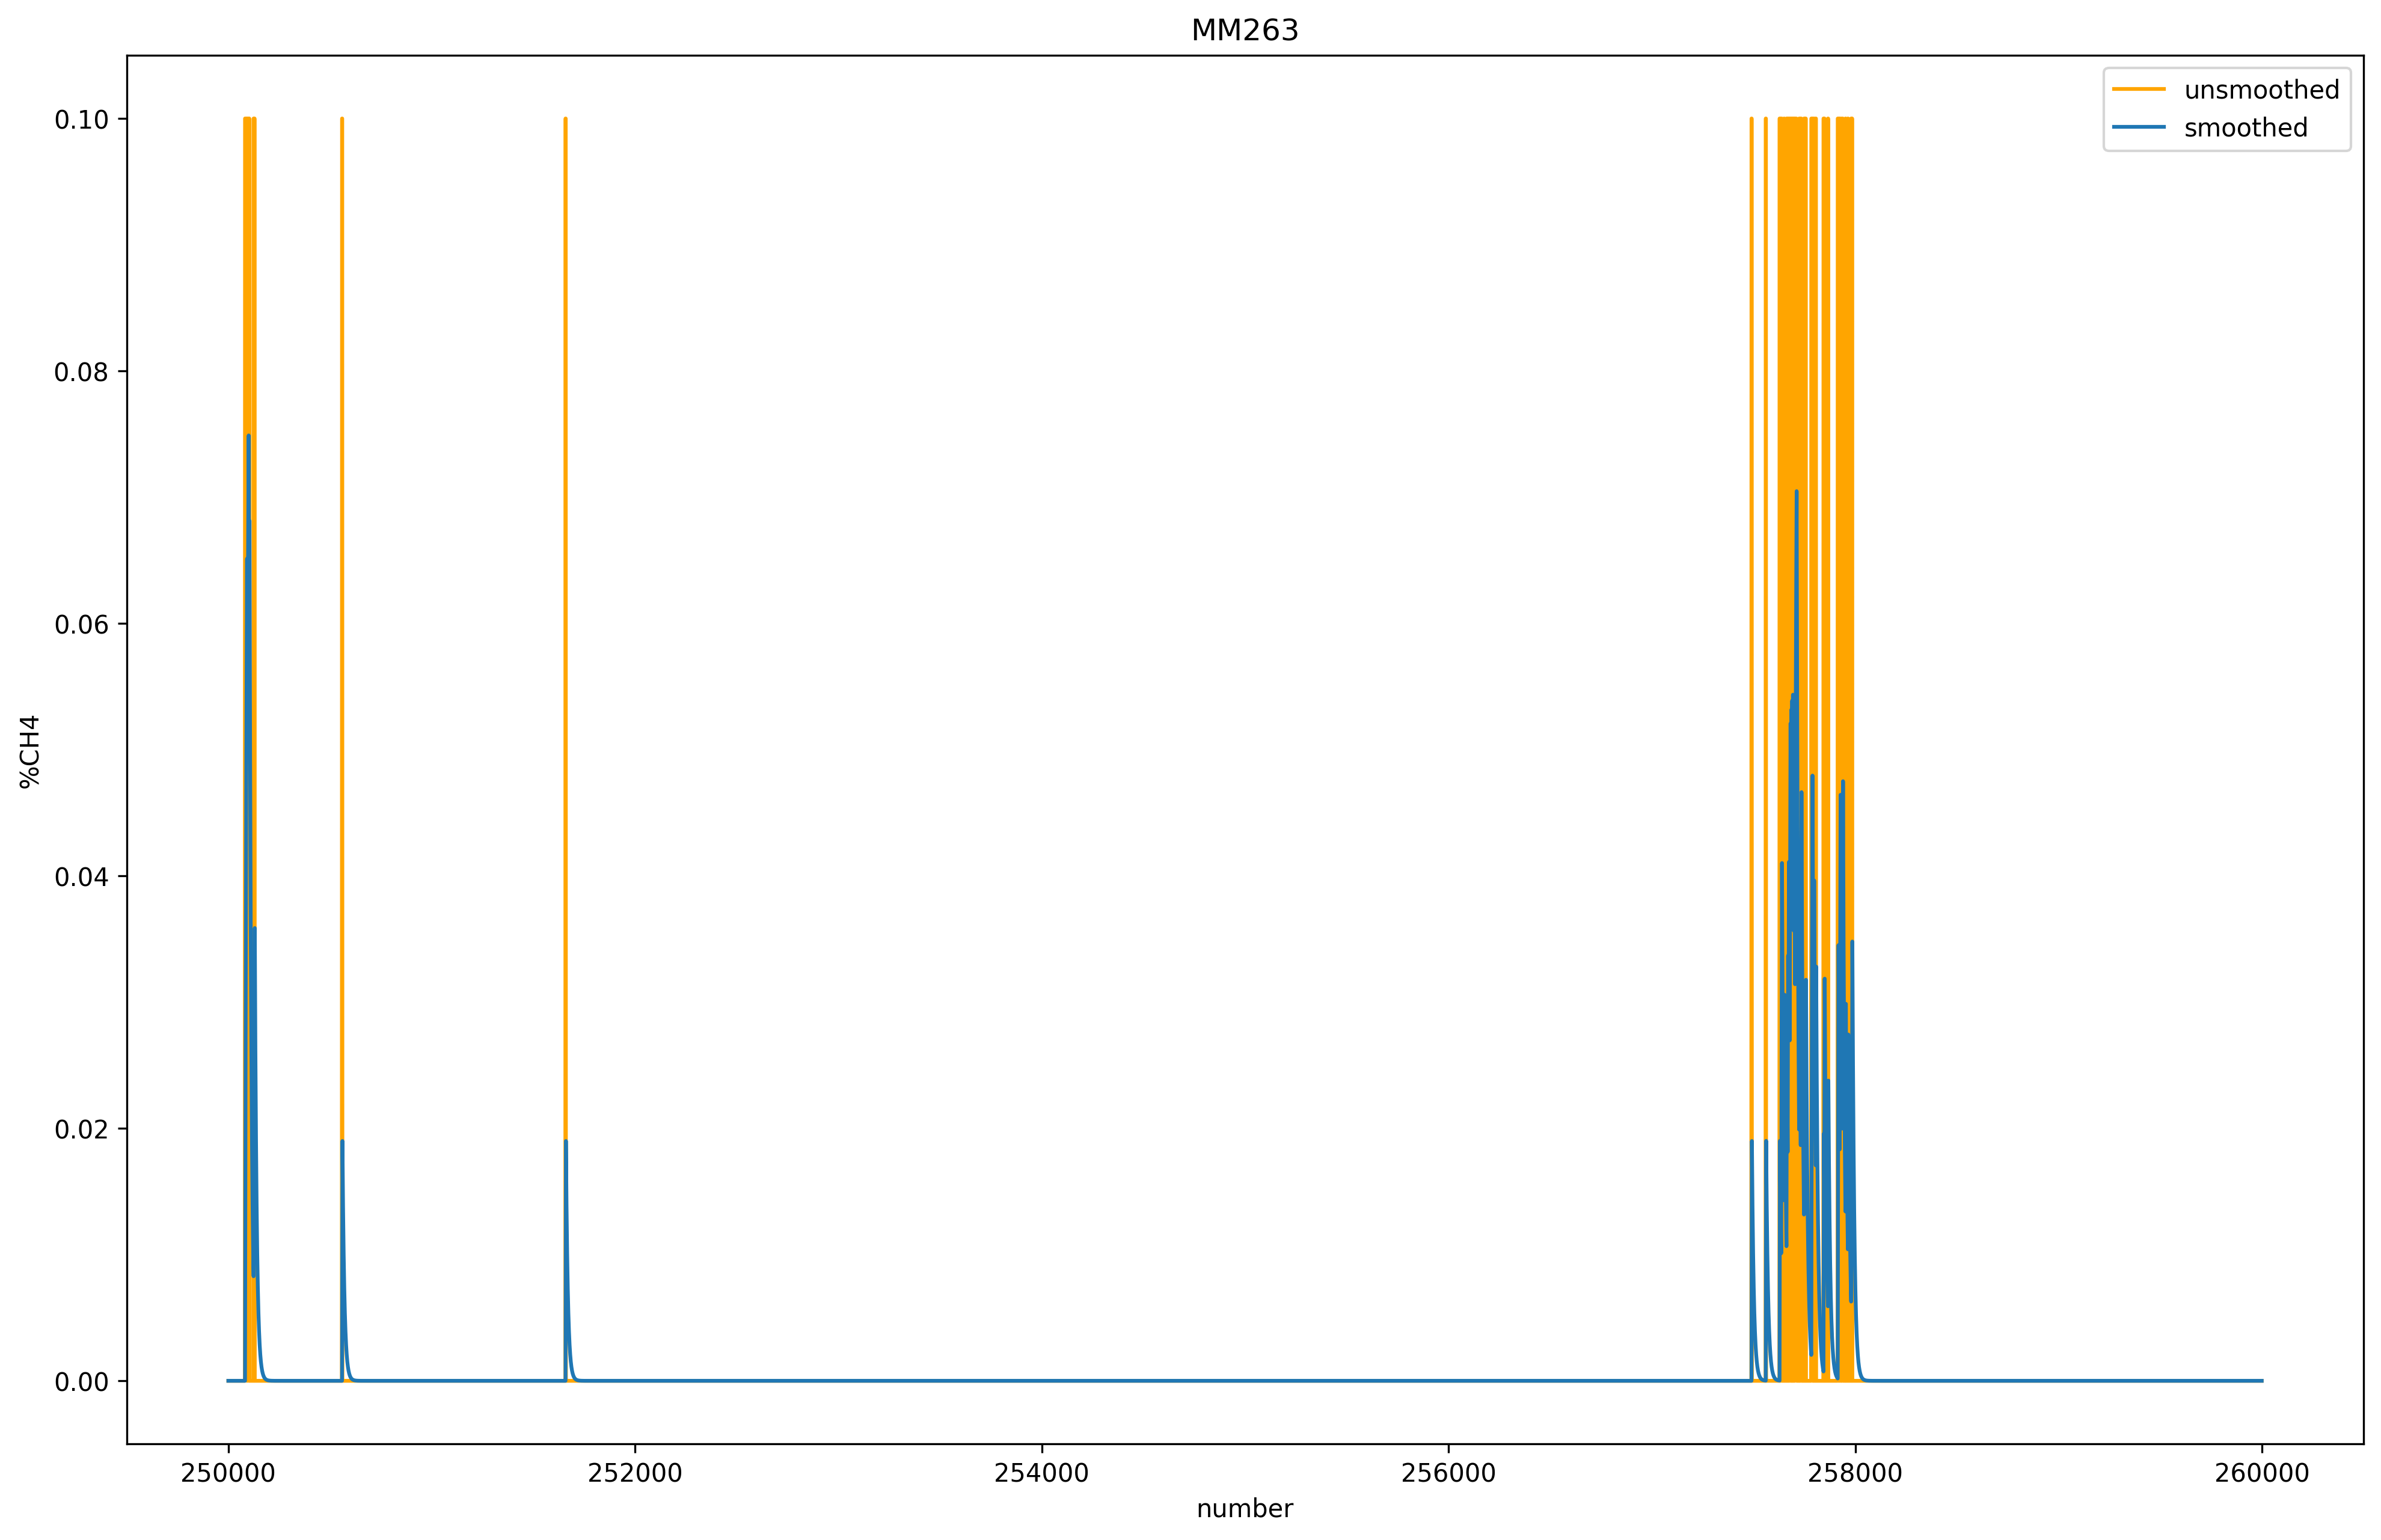

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(unsmoothed.iloc[250000:260000], color='orange')
plt.plot(smoothed.iloc[250000:260000])

plt.title("MM263")
plt.ylabel("%CH4")
plt.xlabel("number")
plt.legend(["unsmoothed", "smoothed"])
plt.savefig('MM263_smoothed.png')

Написание нейронки

In [ ]:
%%time
mlp = MLPRegressor(hidden_layer_sizes=(30, 10), activation='relu', solver='adam', verbose=True, random_state=42, learning_rate="adaptive")
mlp.fit(X_train_MM263, y_train_MM263)

Iteration 1, loss = 3.59326857
Iteration 2, loss = 0.04067607
Iteration 3, loss = 0.02419392
Iteration 4, loss = 0.01001499
Iteration 5, loss = 0.00164780
Iteration 6, loss = 0.00084650
Iteration 7, loss = 0.00077085
Iteration 8, loss = 0.00074391
Iteration 9, loss = 0.00072610
Iteration 10, loss = 0.00070953
Iteration 11, loss = 0.00068887
Iteration 12, loss = 0.00067452
Iteration 13, loss = 0.00066528
Iteration 14, loss = 0.00065156
Iteration 15, loss = 0.00064133
Iteration 16, loss = 0.00063350
Iteration 17, loss = 0.00062428
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
CPU times: user 2min 18s, sys: 2.65 s, total: 2min 21s
Wall time: 2min 22s


MLPRegressor(hidden_layer_sizes=(30, 10), learning_rate='adaptive',
             random_state=42, verbose=True)

In [ ]:
print("Score:", mlp.score(X_test_MM263, y_test_MM263))
print("The mean squared error (MSE) on test set: {:.4f}".format(mean_squared_error(y_test_MM263, mlp.predict(X_test_MM263))))

Score: 0.9622058446020141
The mean squared error (MSE) on test set: 0.0011


In [ ]:
predictions_MM263 = pd.DataFrame(data=mlp.predict(features_MM263))

#### Пример 1

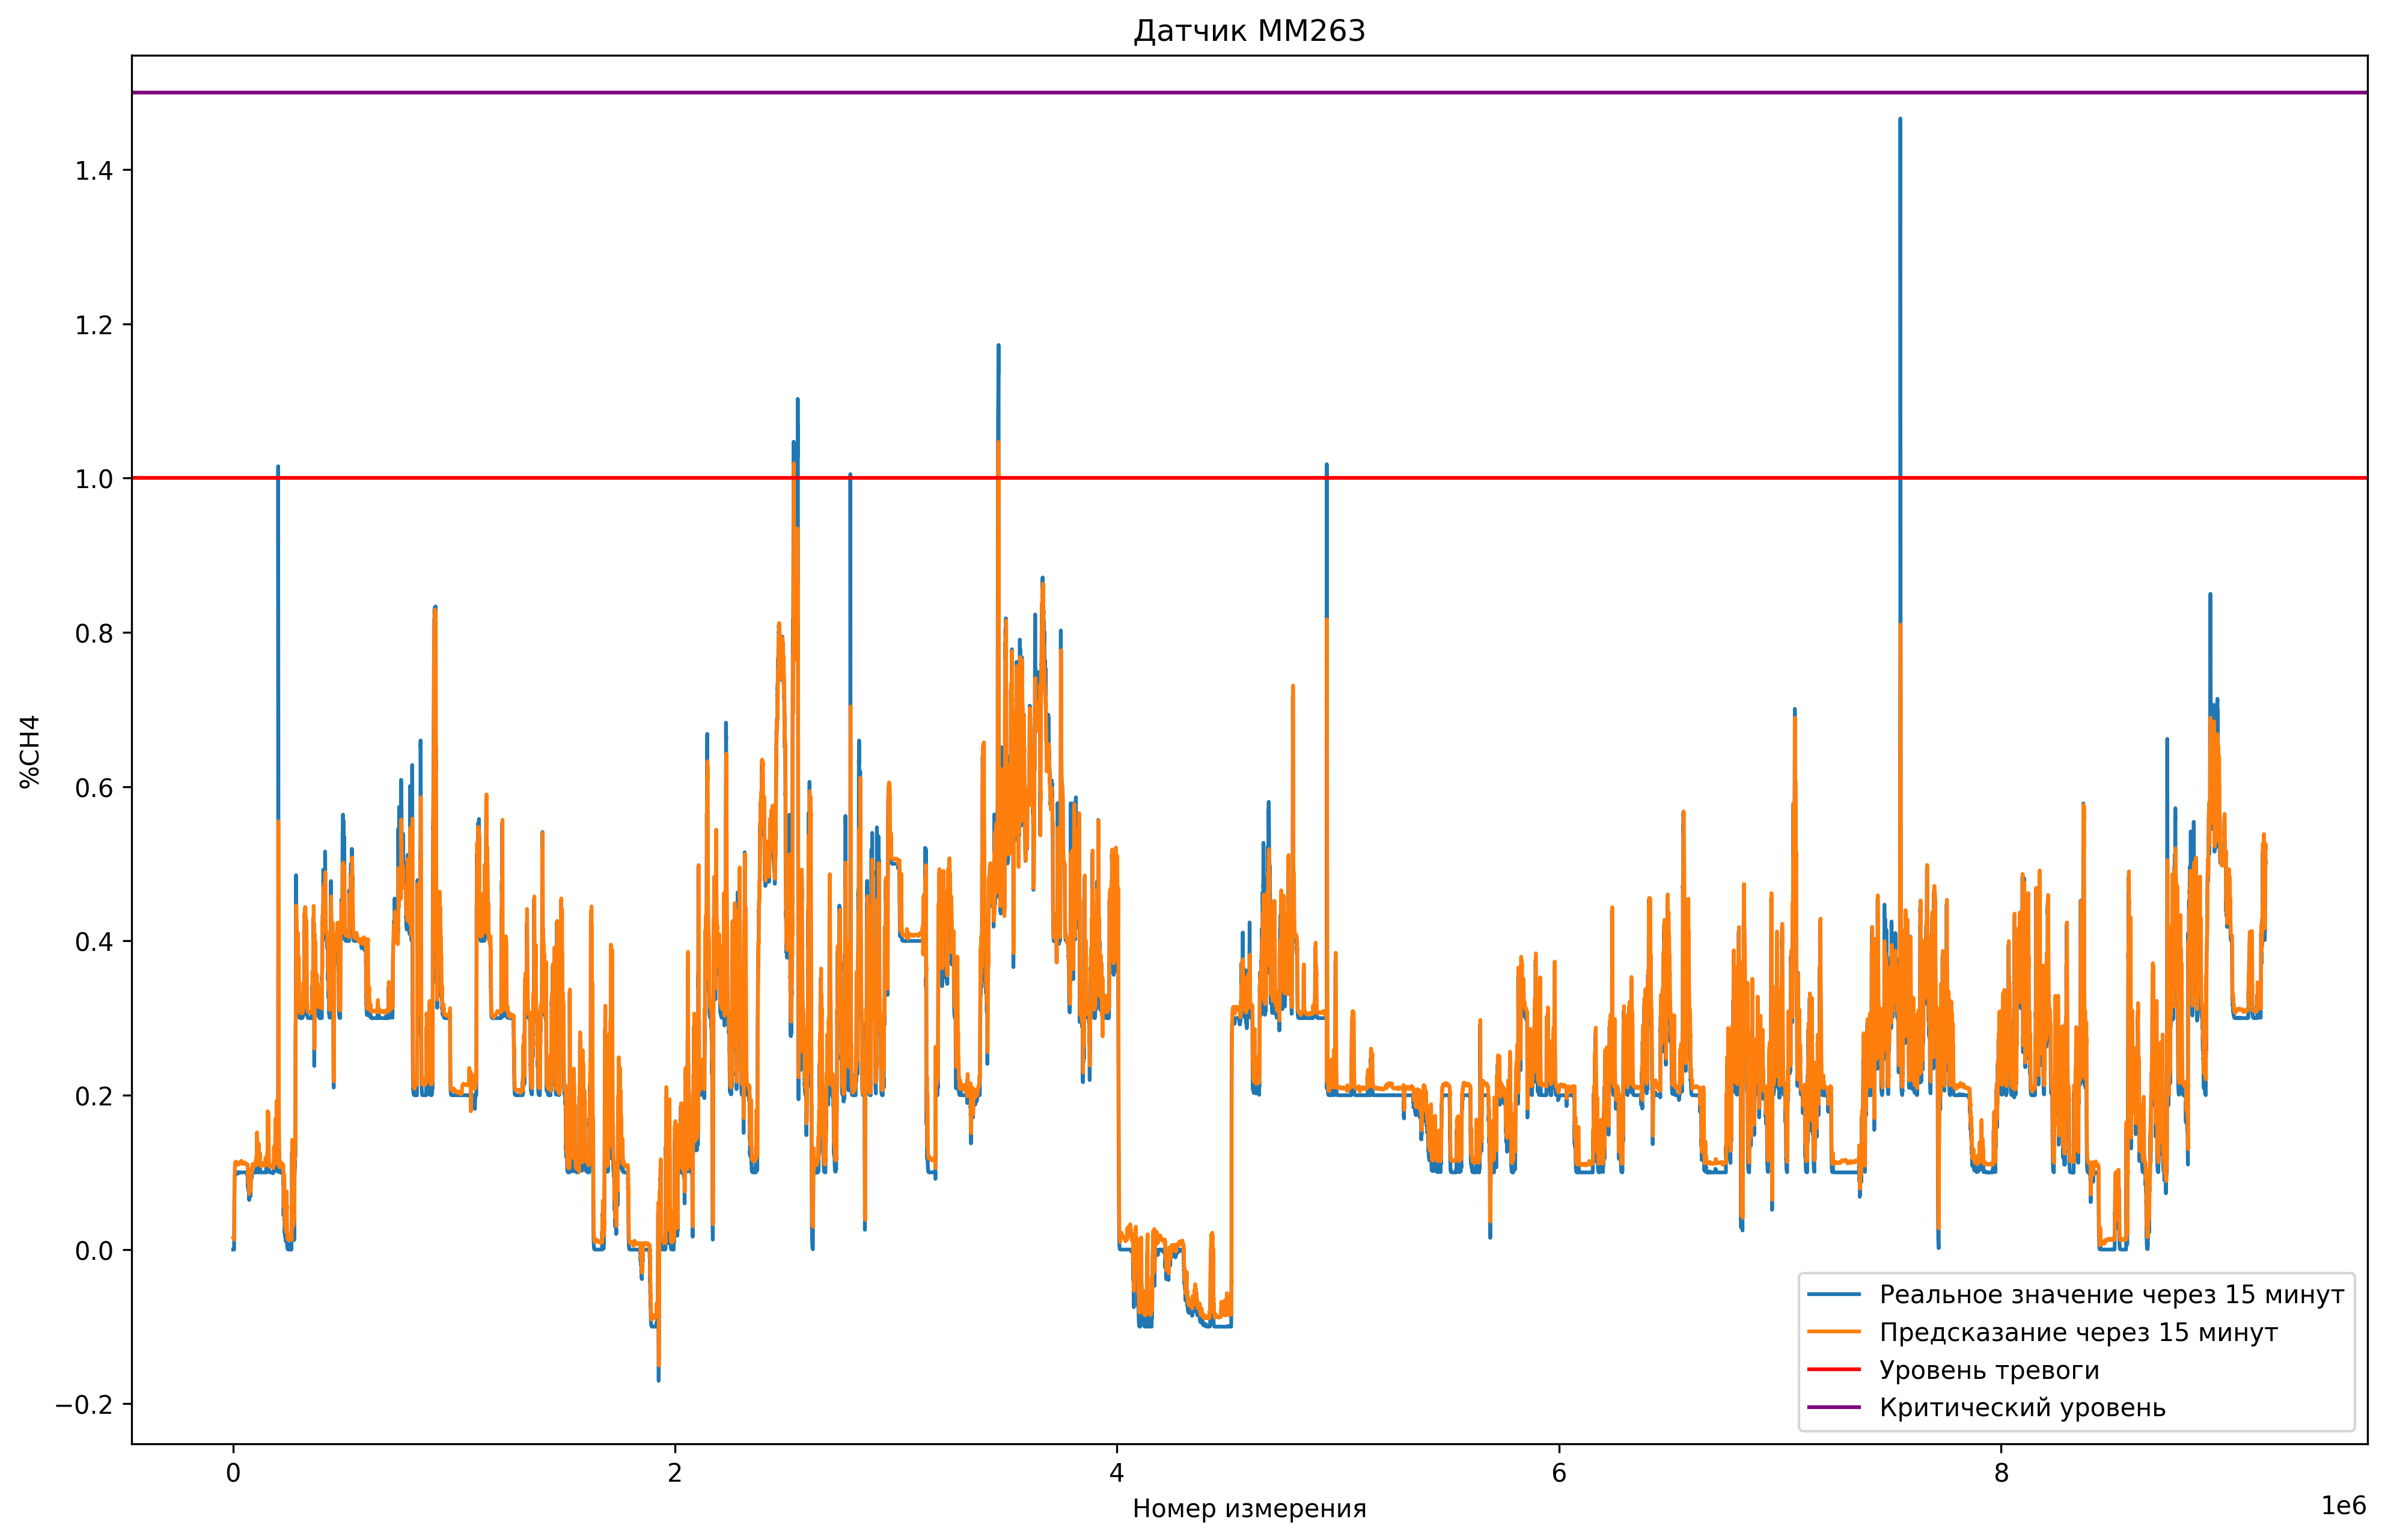

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(target_MM263)
plt.plot(predictions_MM263)

plt.axhline(y = 1, color = 'red', label = 'Warning')
plt.axhline(y = 1.5, color = 'purple', label = 'Alarm')

plt.title("Датчик MM263")
plt.ylabel("%CH4")
plt.xlabel("Номер измерения")
plt.legend(["Реальное значение через 15 минут", "Предсказание через 15 минут", "Уровень тревоги", "Критический уровень"], loc='lower right')
plt.savefig('MM263_1.png')

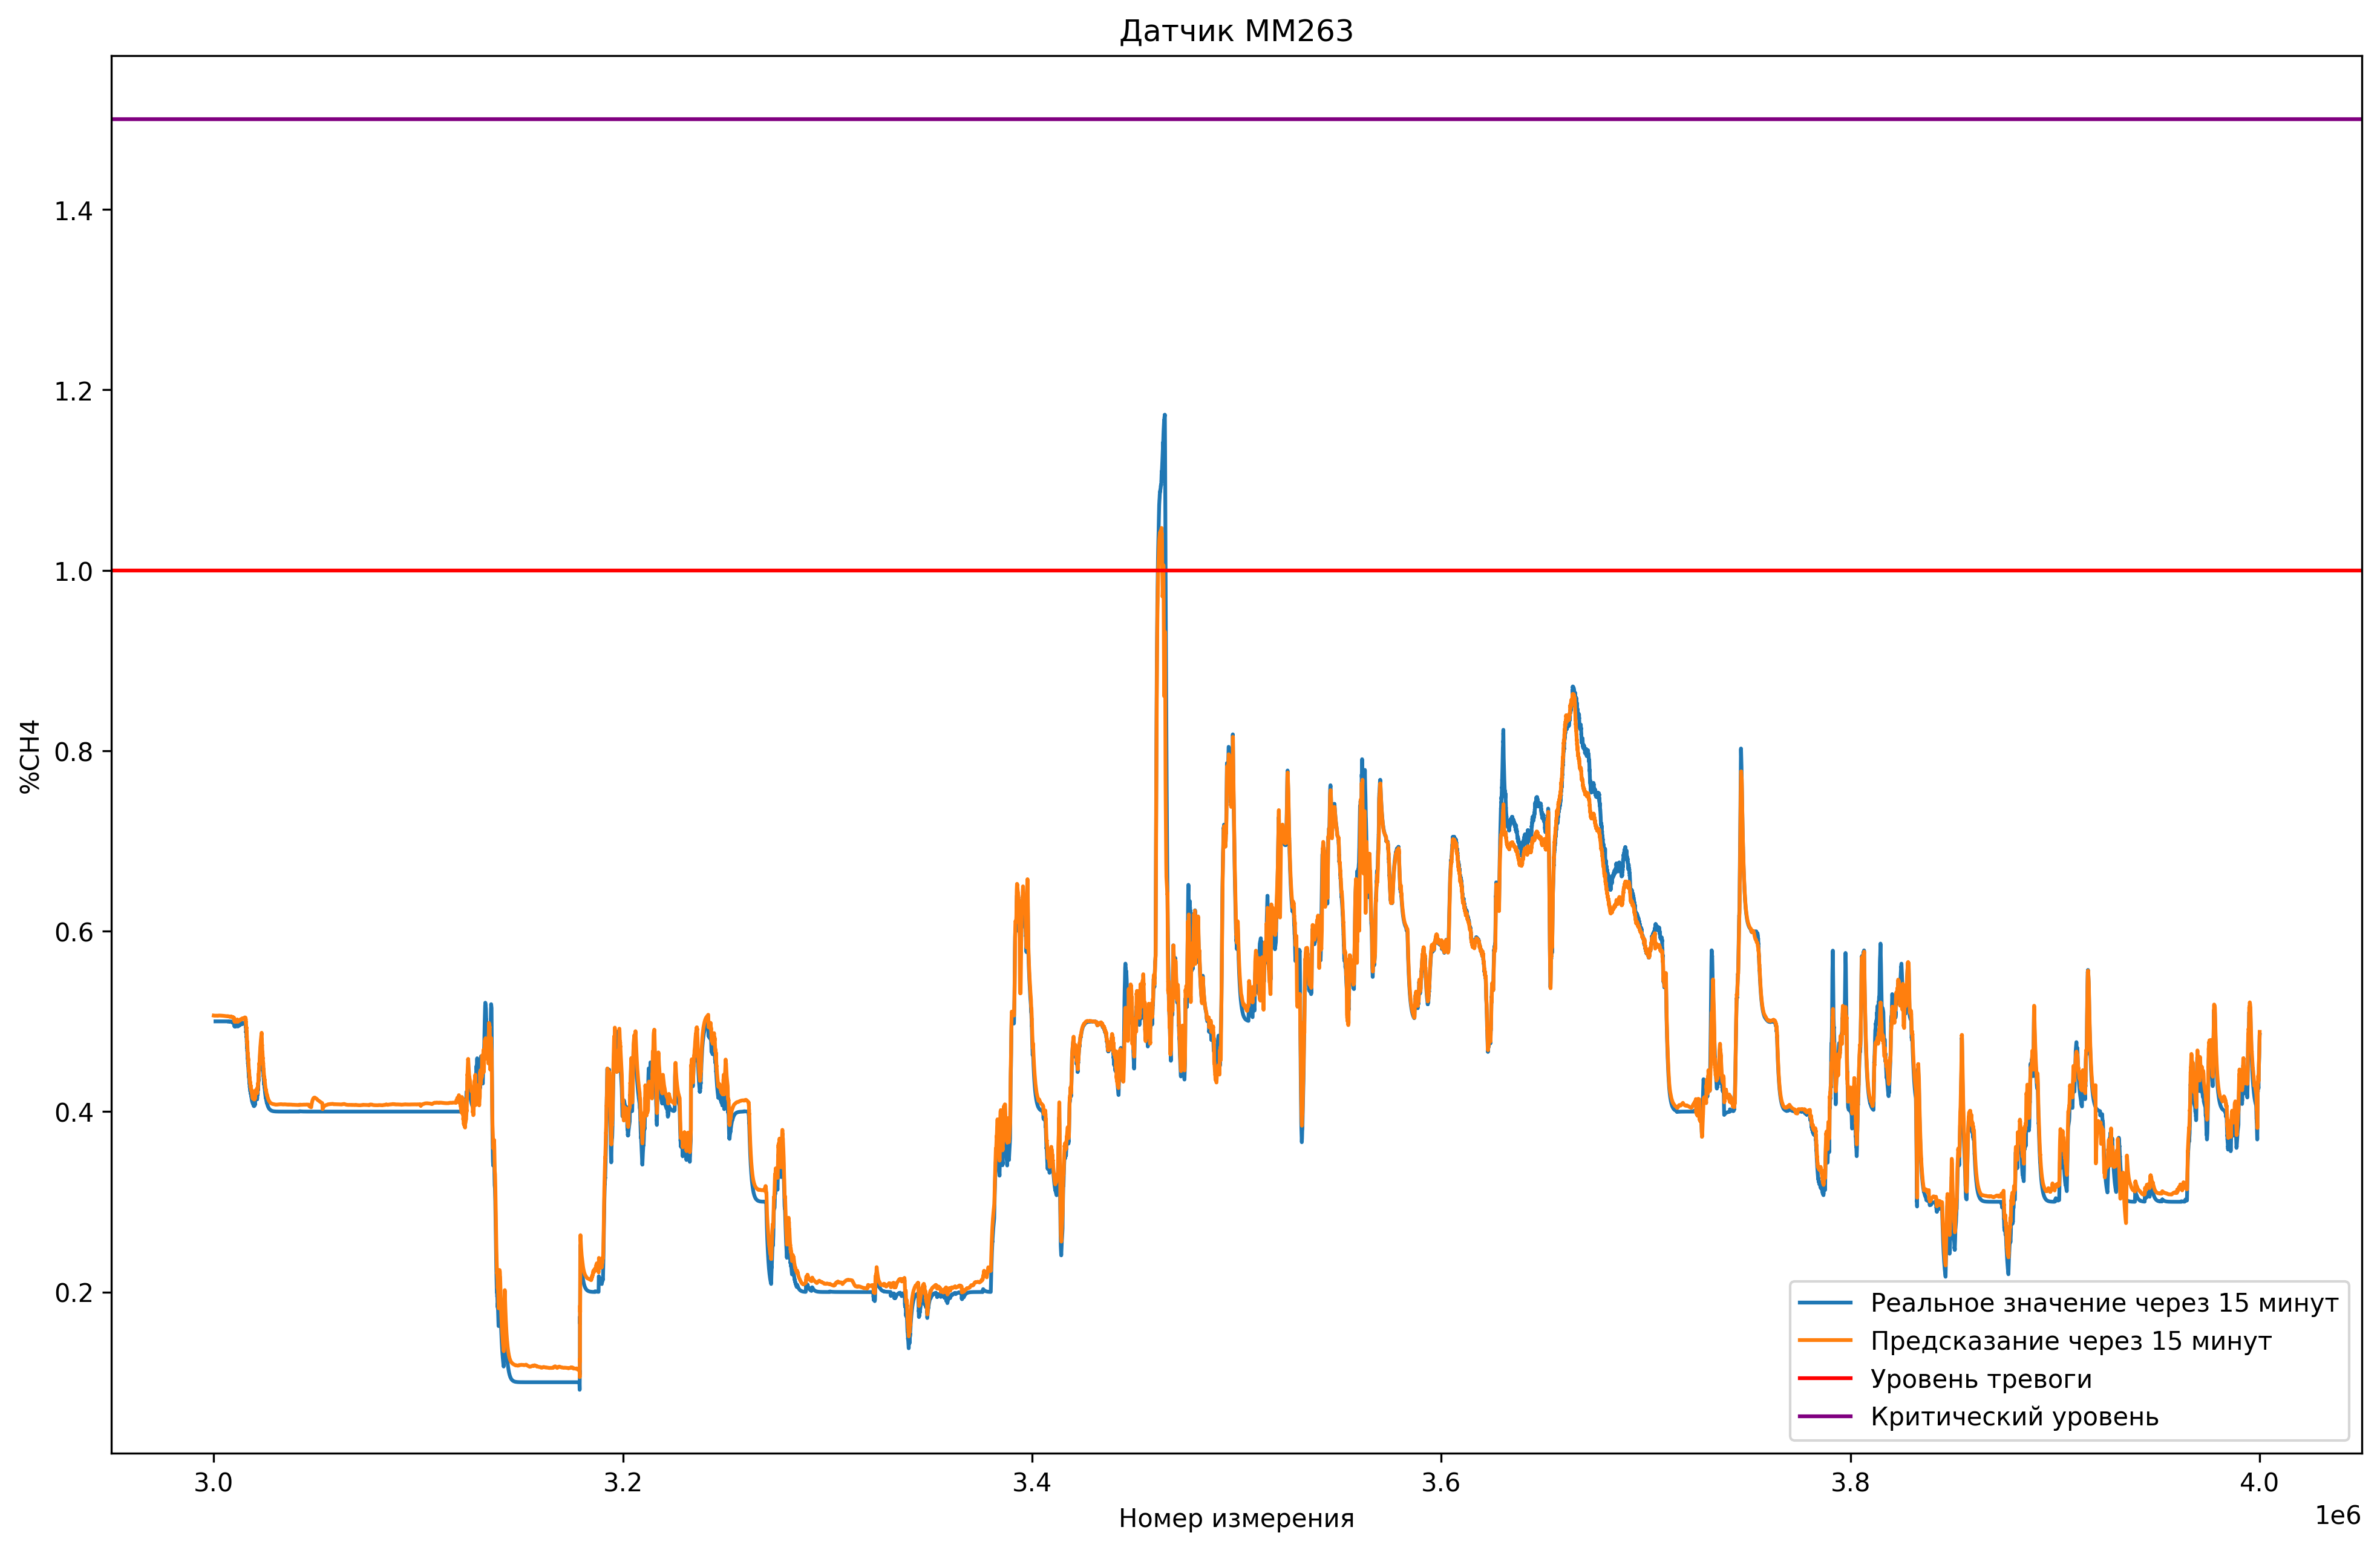

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(target_MM263.iloc[3_000_000:4_000_000])
plt.plot(predictions_MM263.iloc[3_000_000:4_000_000])

plt.axhline(y = 1, color = 'red', label = 'Warning')
plt.axhline(y = 1.5, color = 'purple', label = 'Alarm')

plt.title("Датчик MM263")
plt.ylabel("%CH4")
plt.xlabel("Номер измерения")
plt.legend(["Реальное значение через 15 минут", "Предсказание через 15 минут", "Уровень тревоги", "Критический уровень"], loc='lower right')
plt.savefig('MM263_2.png')

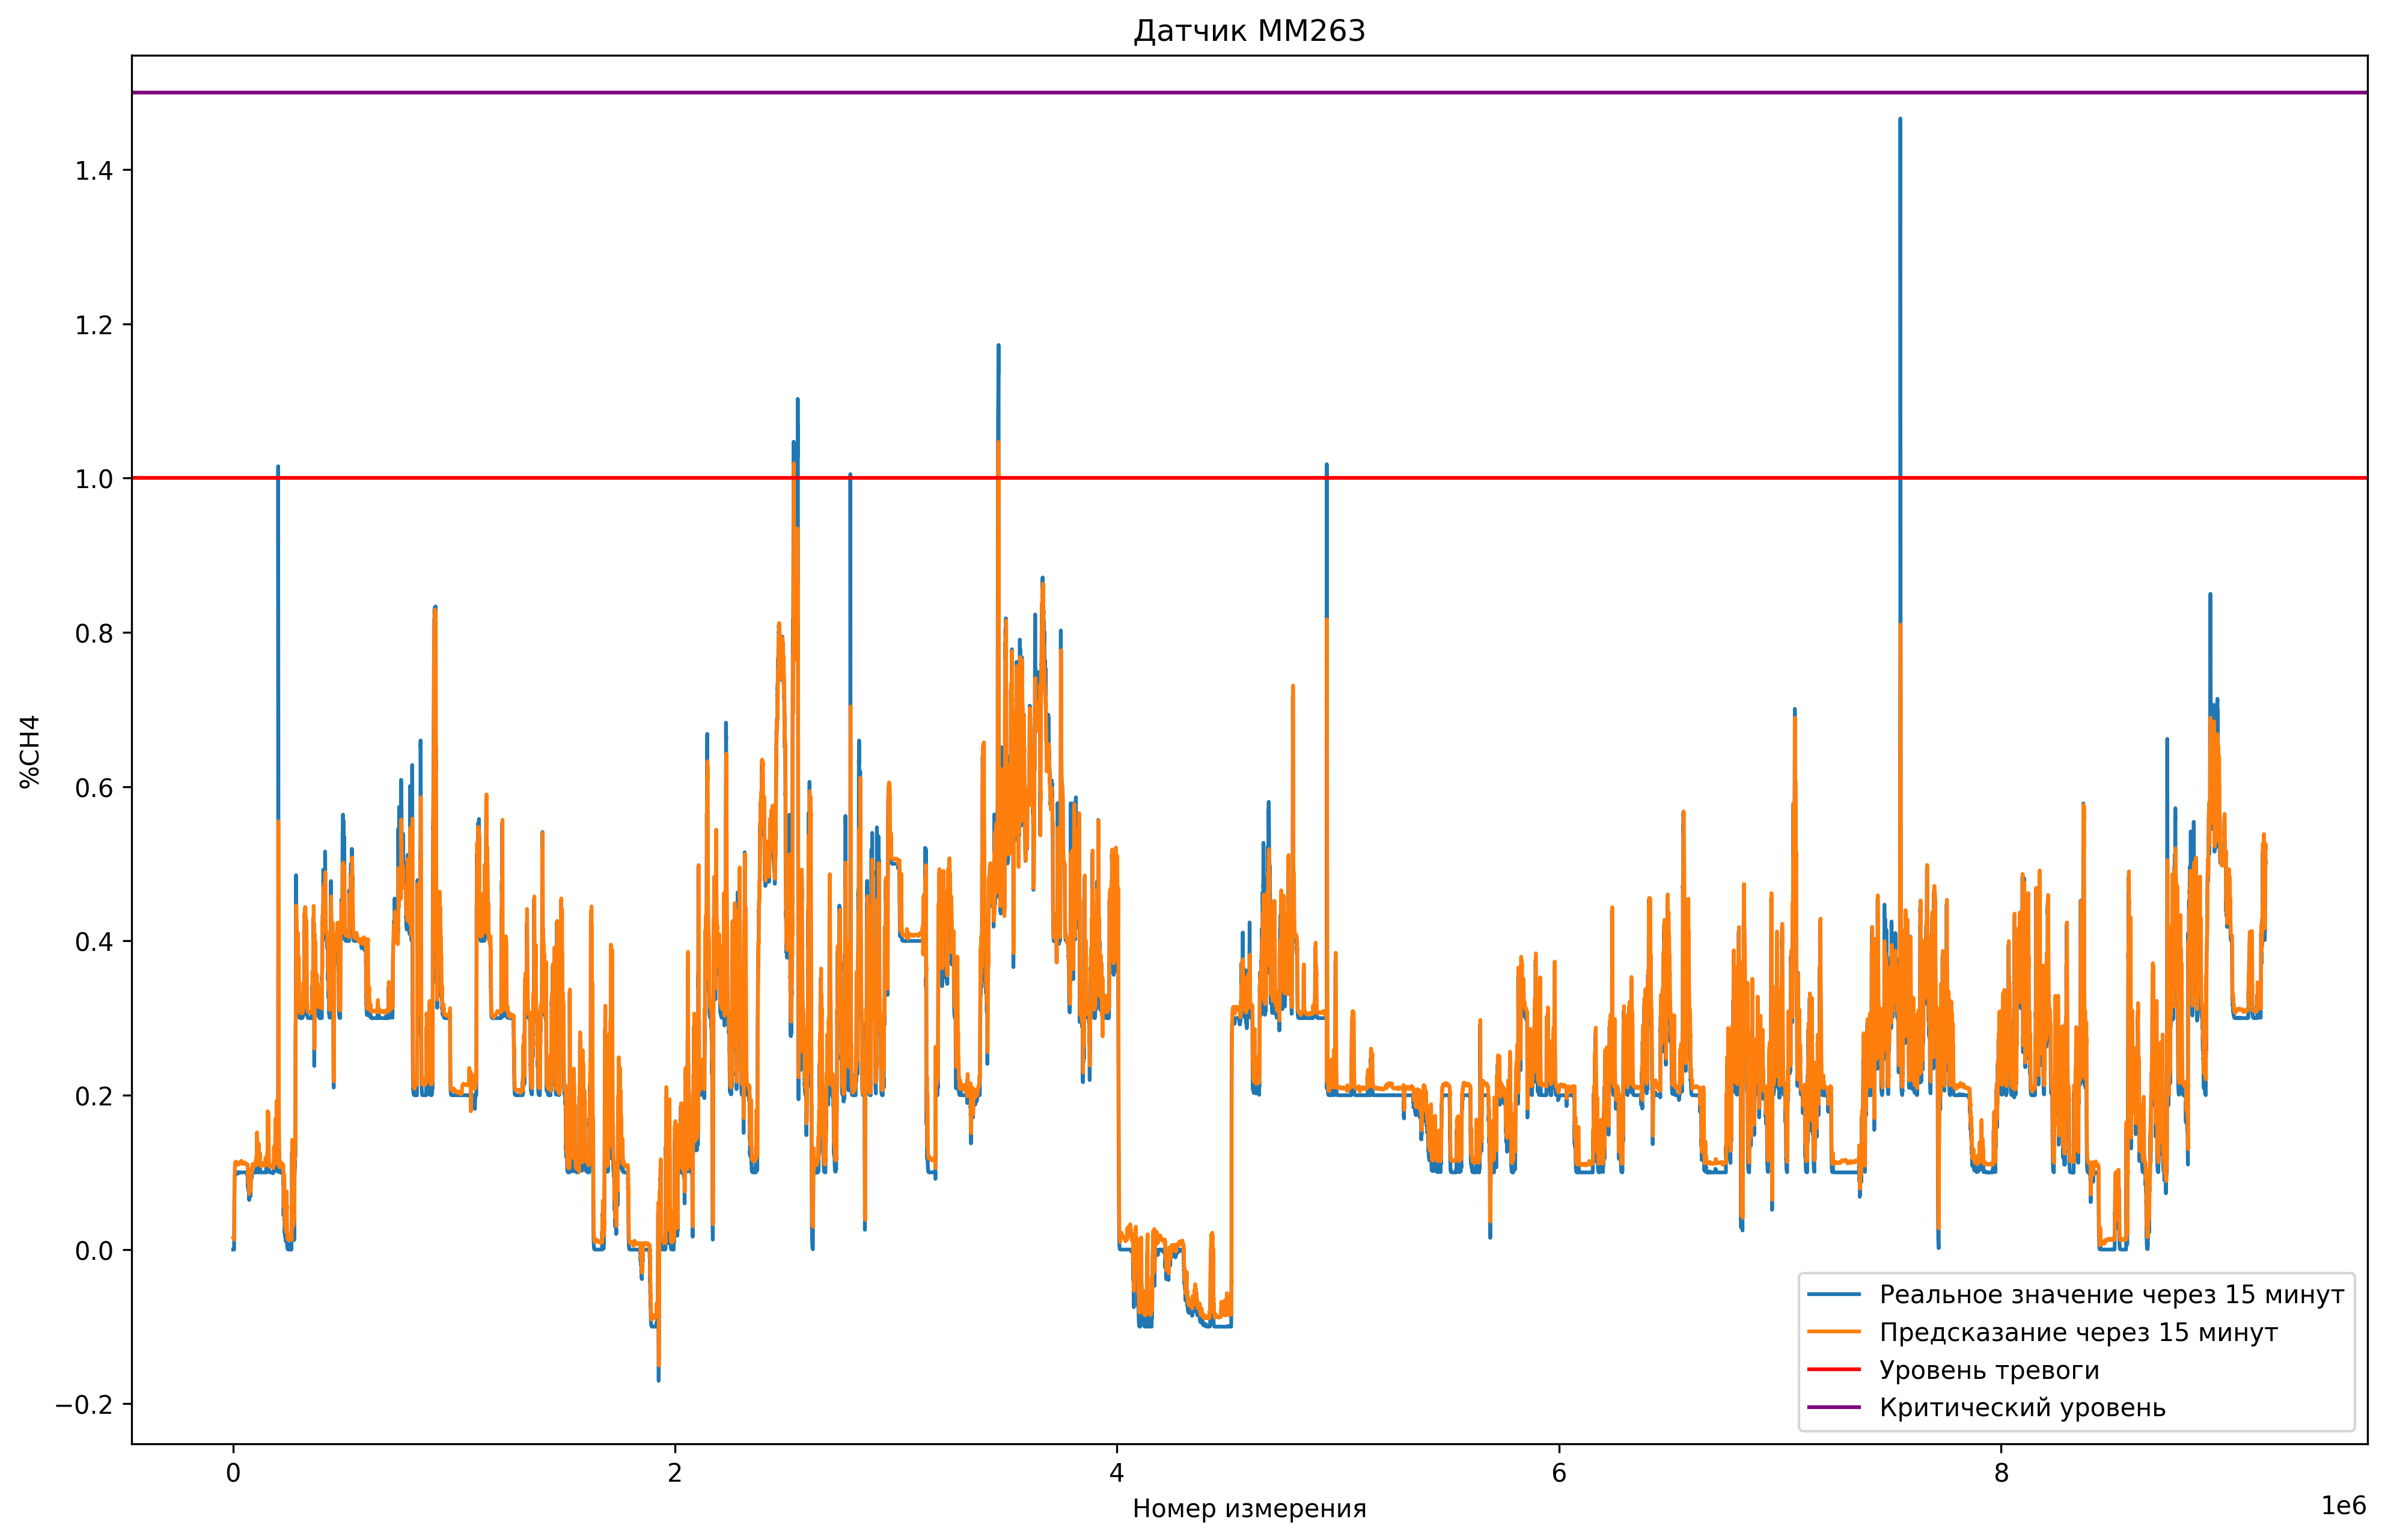

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(target_MM263)
plt.plot(predictions_MM263)

plt.axhline(y = 1, color = 'red', label = 'Warning')
plt.axhline(y = 1.5, color = 'purple', label = 'Alarm')

plt.title("Датчик MM263")
plt.ylabel("%CH4")
plt.xlabel("Номер измерения")
plt.legend(["Реальное значение через 15 минут", "Предсказание через 15 минут", "Уровень тревоги", "Критический уровень"], loc='lower right')
plt.savefig('MM263_total.png')

# MM264

In [ ]:
dataset_MM264 = dataset.copy()
dataset_MM264.loc[:, 'MM264_future'] = dataset_MM264['MM264']
dataset_MM264['MM264_future'] = dataset_MM264['MM264_future'].shift(-900)

dataset_MM264 = dataset_MM264.dropna()
print(dataset_MM264.shape, dataset.shape)

(9199030, 29) (9199930, 28)


In [ ]:
features_MM264 = dataset_MM264[
    ['AN311', 'AN422', 'AN423', 'TP1721', 'RH1722', 'BA1723', 'TP1711',
     'RH1712', 'BA1713', 'MM252', 'MM261', 'MM262', 'MM263', 'MM264',
     'MM256', 'MM211', 'CM861', 'CR863', 'P_864', 'TC862', 'WM868',
     'AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR', 'AMP5_IR',
     'F_SIDE_RIGHT', 'V']]

for column in ['AN311', 'AN422', 'AN423', 'TP1721', 'RH1722', 'BA1723', 'TP1711',
     'RH1712', 'BA1713', 'MM252', 'MM261', 'MM262', 'MM263', 'MM264',
     'MM256', 'MM211', 'CM861', 'CR863', 'P_864', 'TC862', 'WM868',
     'AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR', 'AMP5_IR', 'V']:
    features_MM264.loc[:, column] = SimpleExpSmoothing(features_MM264[column], initialization_method="heuristic").fit(smoothing_level=0.001, optimized=False).fittedvalues

/var/folders/d7/ms8g932s0mngjxsjc18fvb480000gn/T/ipykernel_43627/1816417193.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_MM264.loc[:, column] = SimpleExpSmoothing(features_MM264[column], initialization_method="heuristic").fit(smoothing_level=0.001, optimized=False).fittedvalues
/var/folders/d7/ms8g932s0mngjxsjc18fvb480000gn/T/ipykernel_43627/1816417193.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_MM264.loc[:, column] = SimpleExpSmoothing(features_MM264[column], initializati

In [ ]:
target_MM264 = SimpleExpSmoothing(dataset_MM264['MM264_future'], initialization_method="heuristic").fit(smoothing_level=0.001, optimized=False).fittedvalues

X_train_MM264, X_test_MM264, y_train_MM264, y_test_MM264 = train_test_split(features_MM264, target_MM264, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_MM264_scaled = scaler.fit_transform(X_train_MM264)
X_test_MM264_scaled = scaler.transform(X_test_MM264)

In [ ]:
%%time
mlp_264 = MLPRegressor(hidden_layer_sizes=(30, 10), activation='relu', solver='adam', verbose=True, random_state=42, learning_rate="adaptive")
mlp_264.fit(X_train_MM264, y_train_MM264)

Iteration 1, loss = 3.59771760
Iteration 2, loss = 0.04071704
Iteration 3, loss = 0.02419988
Iteration 4, loss = 0.01018307
Iteration 5, loss = 0.00203644
Iteration 6, loss = 0.00105629
Iteration 7, loss = 0.00094733
Iteration 8, loss = 0.00091046
Iteration 9, loss = 0.00089020
Iteration 10, loss = 0.00087354
Iteration 11, loss = 0.00086125
Iteration 12, loss = 0.00085197
Iteration 13, loss = 0.00084892
Iteration 14, loss = 0.00084770
Iteration 15, loss = 0.00084559
Iteration 16, loss = 0.00084638
Iteration 17, loss = 0.00084283
Iteration 18, loss = 0.00084181
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
CPU times: user 2min 26s, sys: 2.69 s, total: 2min 28s
Wall time: 2min 30s


MLPRegressor(hidden_layer_sizes=(30, 10), learning_rate='adaptive',
             random_state=42, verbose=True)

In [ ]:
print("Score:", mlp_264.score(X_test_MM264, y_test_MM264))
print("The mean squared error (MSE) on test set: {:.4f}".format(mean_squared_error(y_test_MM264, mlp_264.predict(X_test_MM264))))

Score: 0.9457806351738188
The mean squared error (MSE) on test set: 0.0016


In [ ]:
predictions_MM264 = pd.DataFrame(data=mlp_264.predict(features_MM264))

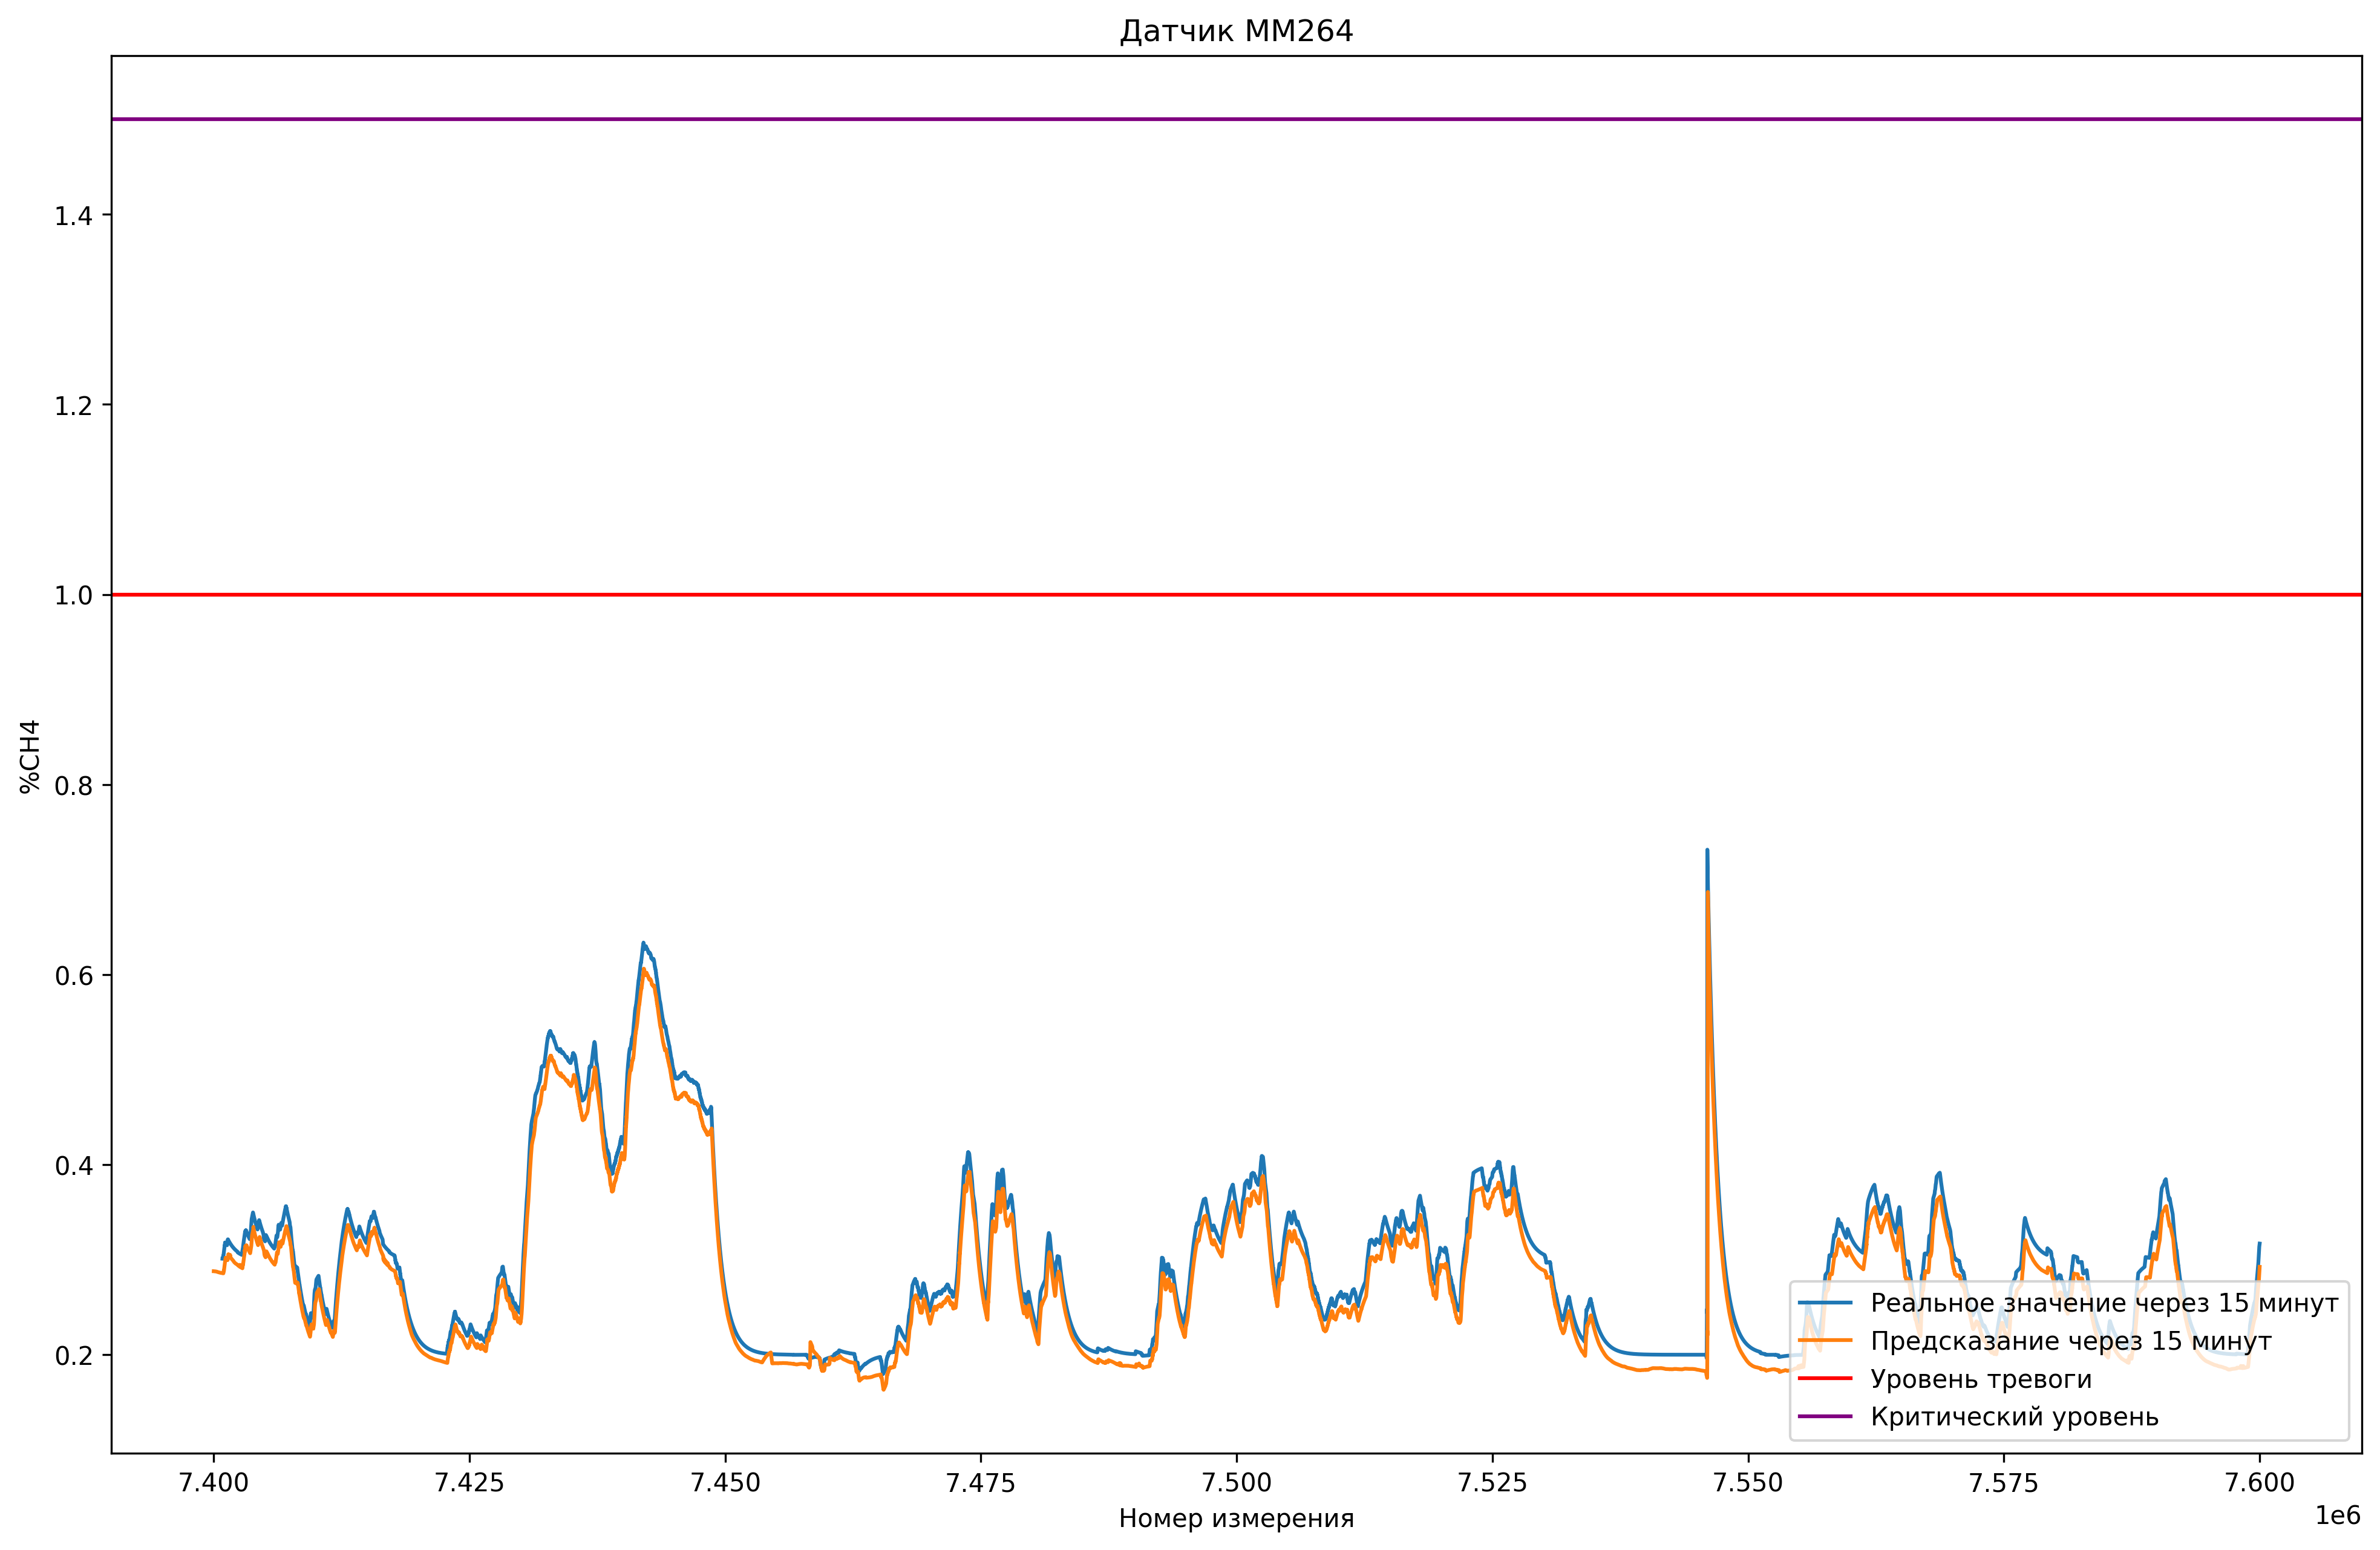

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(target_MM264.iloc[7_400_000:7_600_000])
plt.plot(predictions_MM264.iloc[7_400_000:7_600_000])

plt.axhline(y = 1, color = 'red', label = 'Warning')
plt.axhline(y = 1.5, color = 'purple', label = 'Alarm')

plt.title("Датчик MM264")
plt.ylabel("%CH4")
plt.xlabel("Номер измерения")
plt.legend(["Реальное значение через 15 минут", "Предсказание через 15 минут", "Уровень тревоги", "Критический уровень"], loc='lower right')
plt.savefig('MM264_1.png')

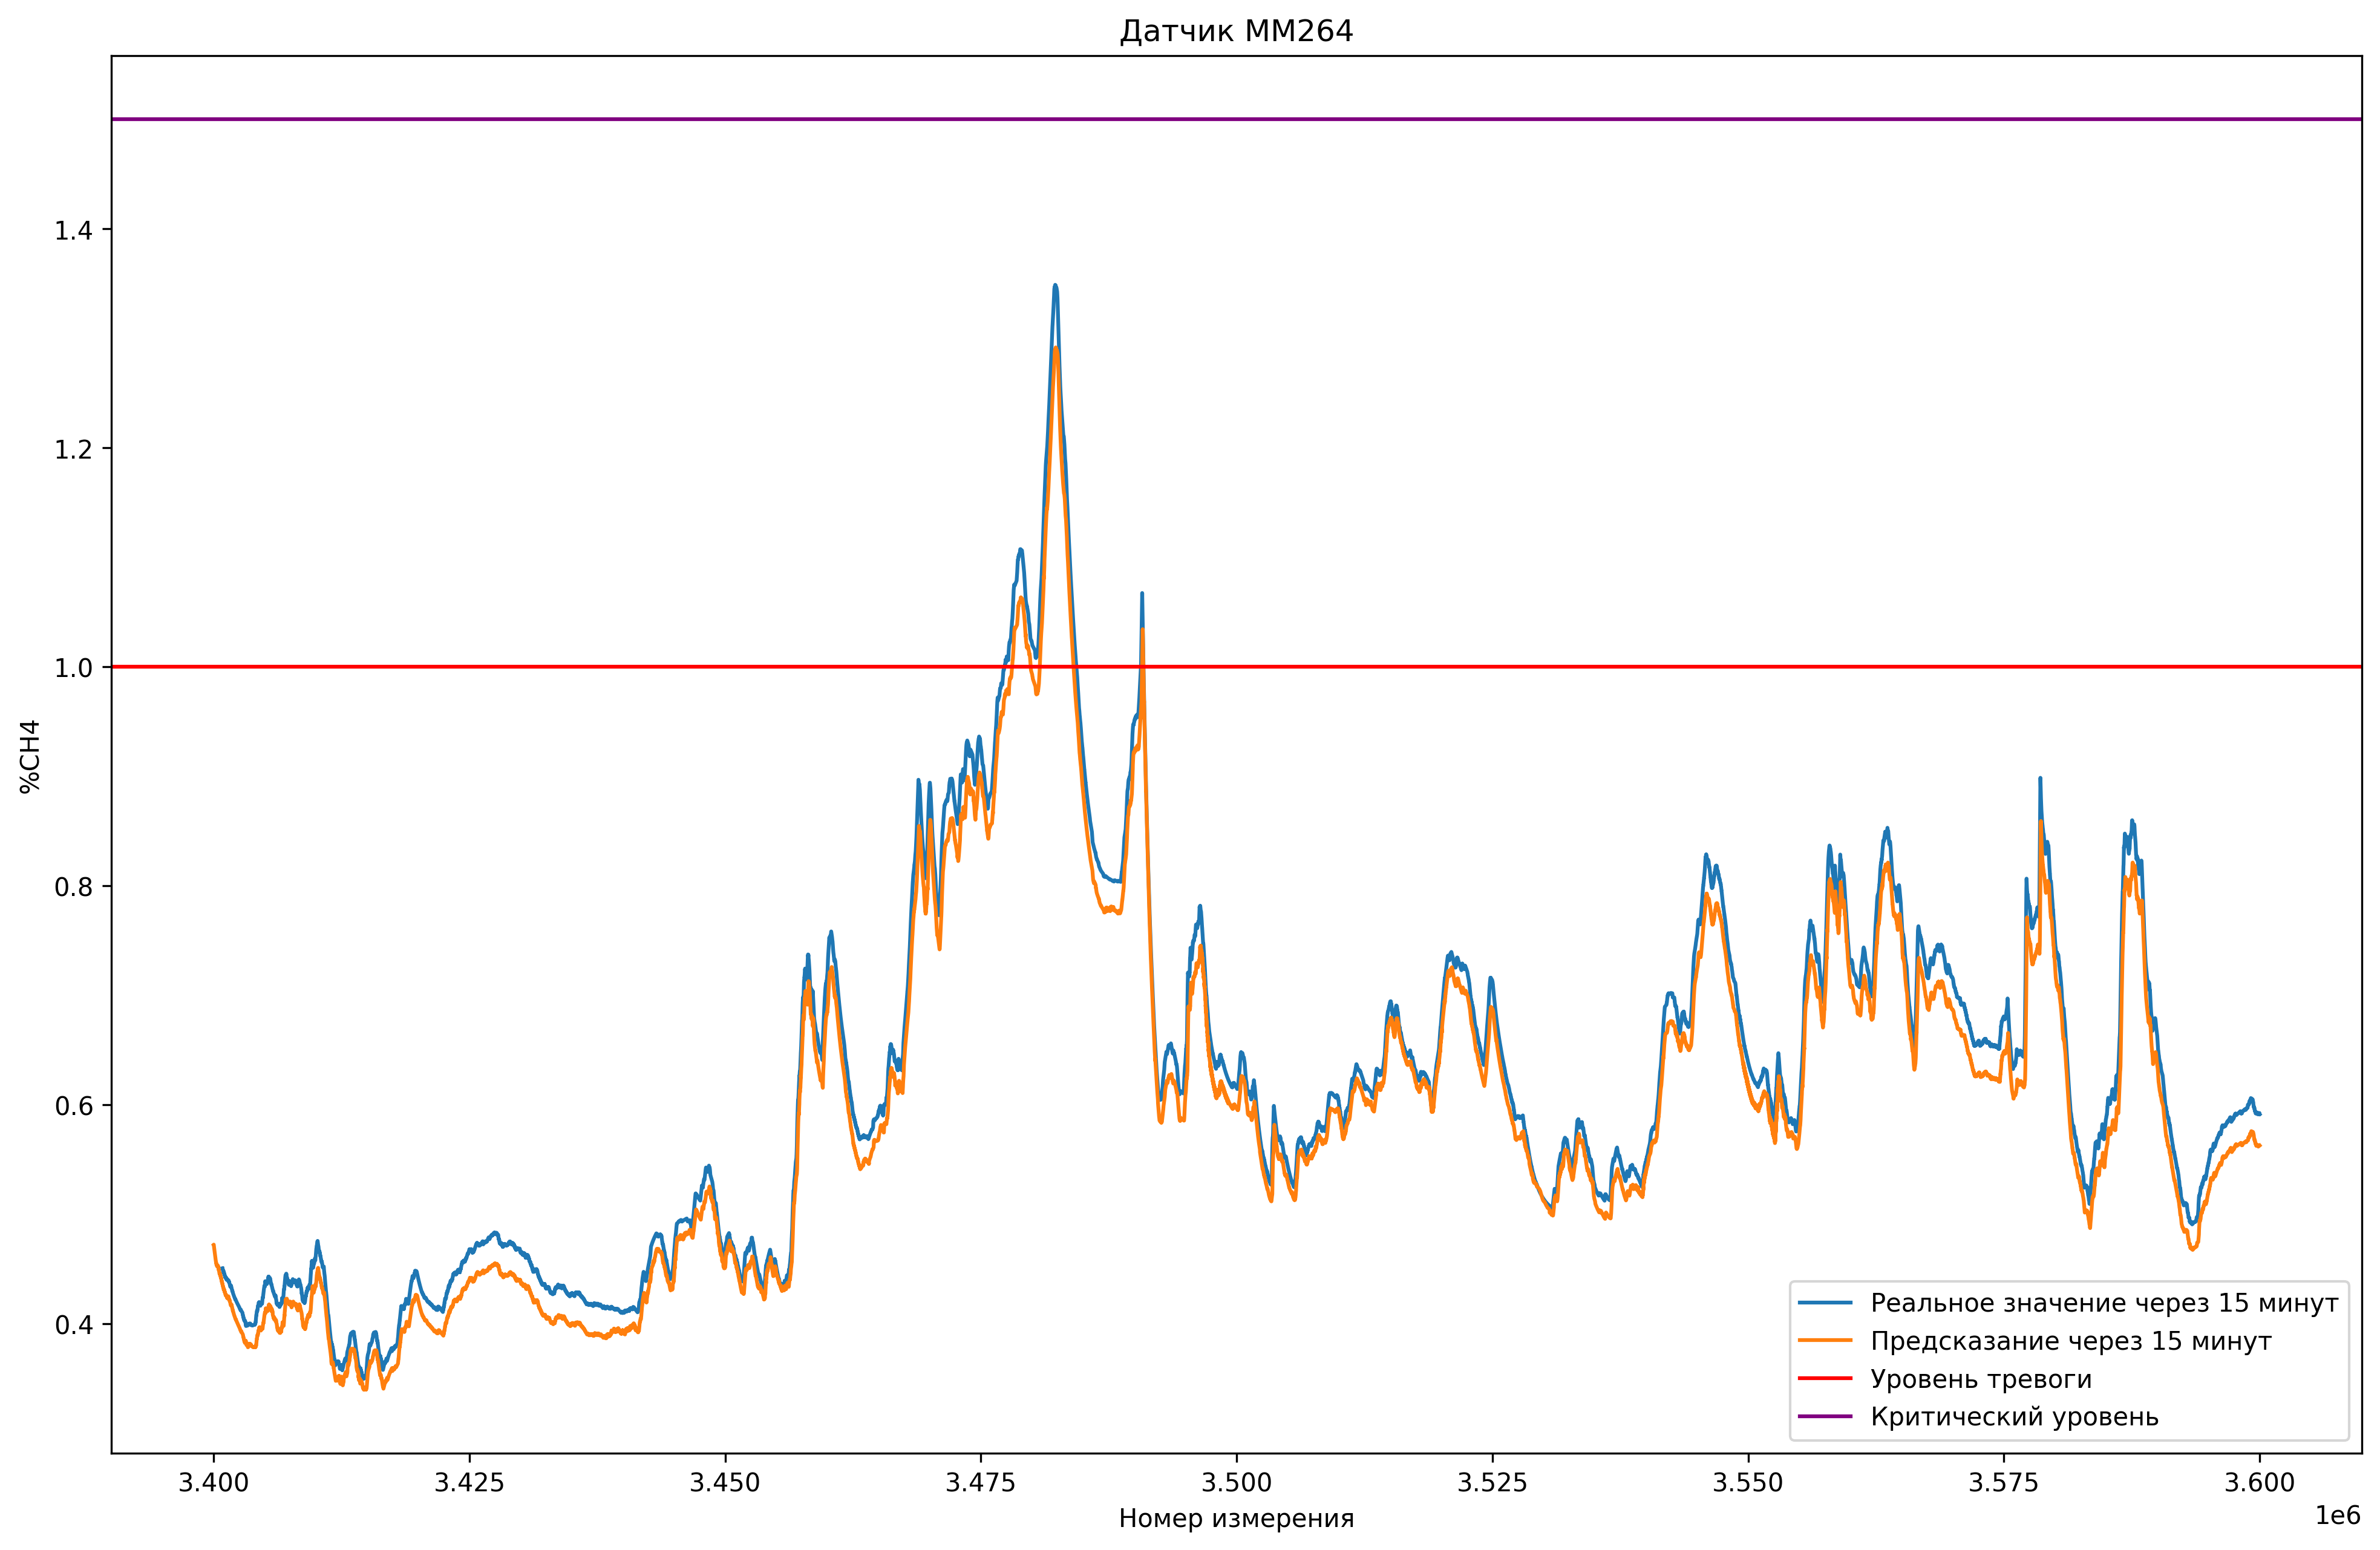

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(target_MM264.iloc[3_400_000:3_600_000])
plt.plot(predictions_MM264.iloc[3_400_000:3_600_000])

plt.axhline(y = 1, color = 'red', label = 'Warning')
plt.axhline(y = 1.5, color = 'purple', label = 'Alarm')

plt.title("Датчик MM264")
plt.ylabel("%CH4")
plt.xlabel("Номер измерения")
plt.legend(["Реальное значение через 15 минут", "Предсказание через 15 минут", "Уровень тревоги", "Критический уровень"], loc='lower right')
plt.savefig('MM264_2.png')

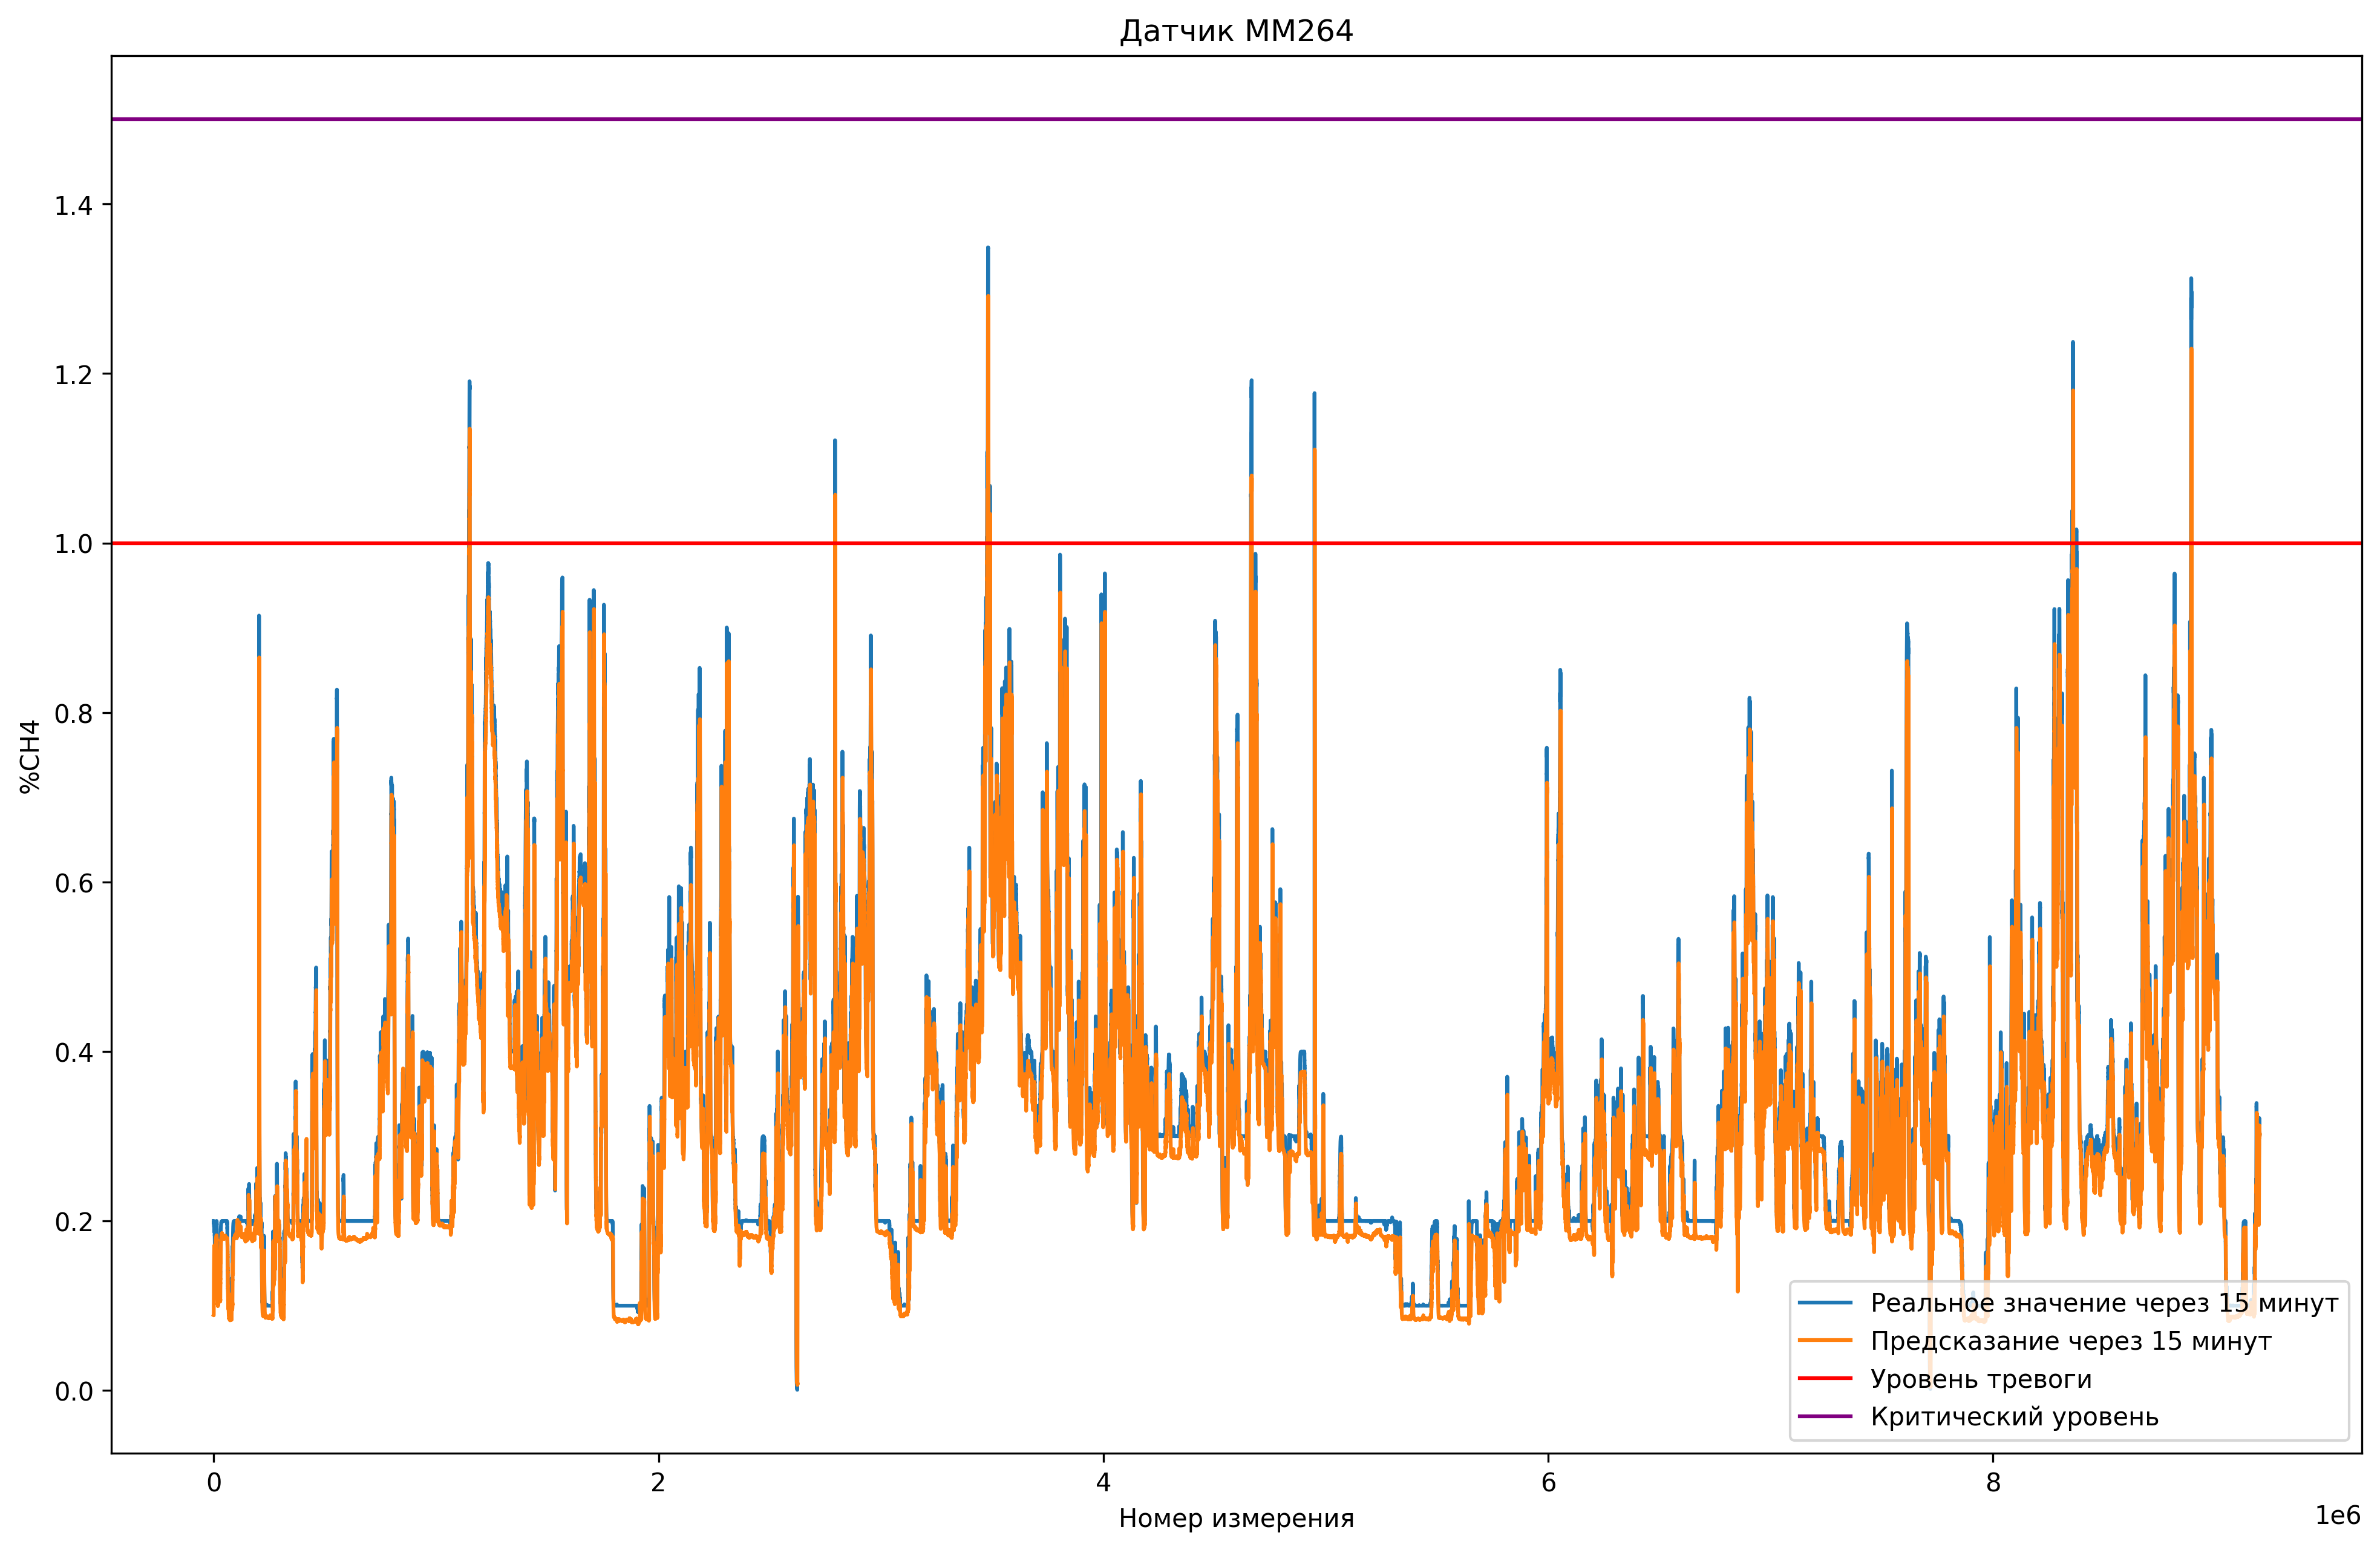

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(target_MM264)
plt.plot(predictions_MM264)

plt.axhline(y = 1, color = 'red', label = 'Warning')
plt.axhline(y = 1.5, color = 'purple', label = 'Alarm')

plt.title("Датчик MM264")
plt.ylabel("%CH4")
plt.xlabel("Номер измерения")
plt.legend(["Реальное значение через 15 минут", "Предсказание через 15 минут", "Уровень тревоги", "Критический уровень"], loc='lower right')
plt.savefig('MM264_total.png')

# MM256

In [ ]:
dataset_MM256 = dataset.copy()
dataset_MM256.loc[:, 'MM256_future'] = dataset_MM256['MM256']
dataset_MM256['MM256_future'] = dataset_MM256['MM256_future'].shift(-900)

dataset_MM256 = dataset_MM256.dropna()
print(dataset_MM256.shape, dataset.shape)

(9199030, 29) (9199930, 28)


In [ ]:
features_MM256 = dataset_MM256[
    ['AN311', 'AN422', 'AN423', 'TP1721', 'RH1722', 'BA1723', 'TP1711',
     'RH1712', 'BA1713', 'MM252', 'MM261', 'MM262', 'MM263', 'MM264',
     'MM256', 'MM211', 'CM861', 'CR863', 'P_864', 'TC862', 'WM868',
     'AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR', 'AMP5_IR',
     'F_SIDE_RIGHT', 'V']]

for column in ['AN311', 'AN422', 'AN423', 'TP1721', 'RH1722', 'BA1723', 'TP1711',
     'RH1712', 'BA1713', 'MM252', 'MM261', 'MM262', 'MM263', 'MM264',
     'MM256', 'MM211', 'CM861', 'CR863', 'P_864', 'TC862', 'WM868',
     'AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR', 'AMP5_IR', 'V']:
    features_MM256.loc[:, column] = SimpleExpSmoothing(features_MM256[column], initialization_method="heuristic").fit(smoothing_level=0.001, optimized=False).fittedvalues

/var/folders/d7/ms8g932s0mngjxsjc18fvb480000gn/T/ipykernel_43627/4289998680.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_MM256.loc[:, column] = SimpleExpSmoothing(features_MM256[column], initialization_method="heuristic").fit(smoothing_level=0.001, optimized=False).fittedvalues
/var/folders/d7/ms8g932s0mngjxsjc18fvb480000gn/T/ipykernel_43627/4289998680.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_MM256.loc[:, column] = SimpleExpSmoothing(features_MM256[column], initializati

In [ ]:
target_MM256 = SimpleExpSmoothing(dataset_MM256['MM256_future'], initialization_method="heuristic").fit(smoothing_level=0.001, optimized=False).fittedvalues

X_train_MM256, X_test_MM256, y_train_MM256, y_test_MM256 = train_test_split(features_MM256, target_MM256, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_MM256_scaled = scaler.fit_transform(X_train_MM256)
X_test_MM256_scaled = scaler.transform(X_test_MM256)

In [ ]:
%%time
mlp_264 = MLPRegressor(hidden_layer_sizes=(30, 10), activation='relu', solver='adam', verbose=True, random_state=42, learning_rate="adaptive")
mlp_264.fit(X_train_MM256, y_train_MM256)

Iteration 1, loss = 3.60145470
Iteration 2, loss = 0.04093117
Iteration 3, loss = 0.02440108
Iteration 4, loss = 0.01009819
Iteration 5, loss = 0.00216839
Iteration 6, loss = 0.00096459
Iteration 7, loss = 0.00086462
Iteration 8, loss = 0.00083193
Iteration 9, loss = 0.00081418
Iteration 10, loss = 0.00080120
Iteration 11, loss = 0.00079319
Iteration 12, loss = 0.00078579
Iteration 13, loss = 0.00078948
Iteration 14, loss = 0.00078519
Iteration 15, loss = 0.00078339
Iteration 16, loss = 0.00078223
Iteration 17, loss = 0.00077895
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
CPU times: user 2min 18s, sys: 2.56 s, total: 2min 20s
Wall time: 2min 23s


MLPRegressor(hidden_layer_sizes=(30, 10), learning_rate='adaptive',
             random_state=42, verbose=True)

In [ ]:
print("Score:", mlp_264.score(X_test_MM256, y_test_MM256))
print("The mean squared error (MSE) on test set: {:.4f}".format(mean_squared_error(y_test_MM256, mlp_264.predict(X_test_MM256))))

Score: 0.9497692170905025
The mean squared error (MSE) on test set: 0.0016


In [ ]:
predictions_MM256 = pd.DataFrame(data=mlp_264.predict(features_MM256))

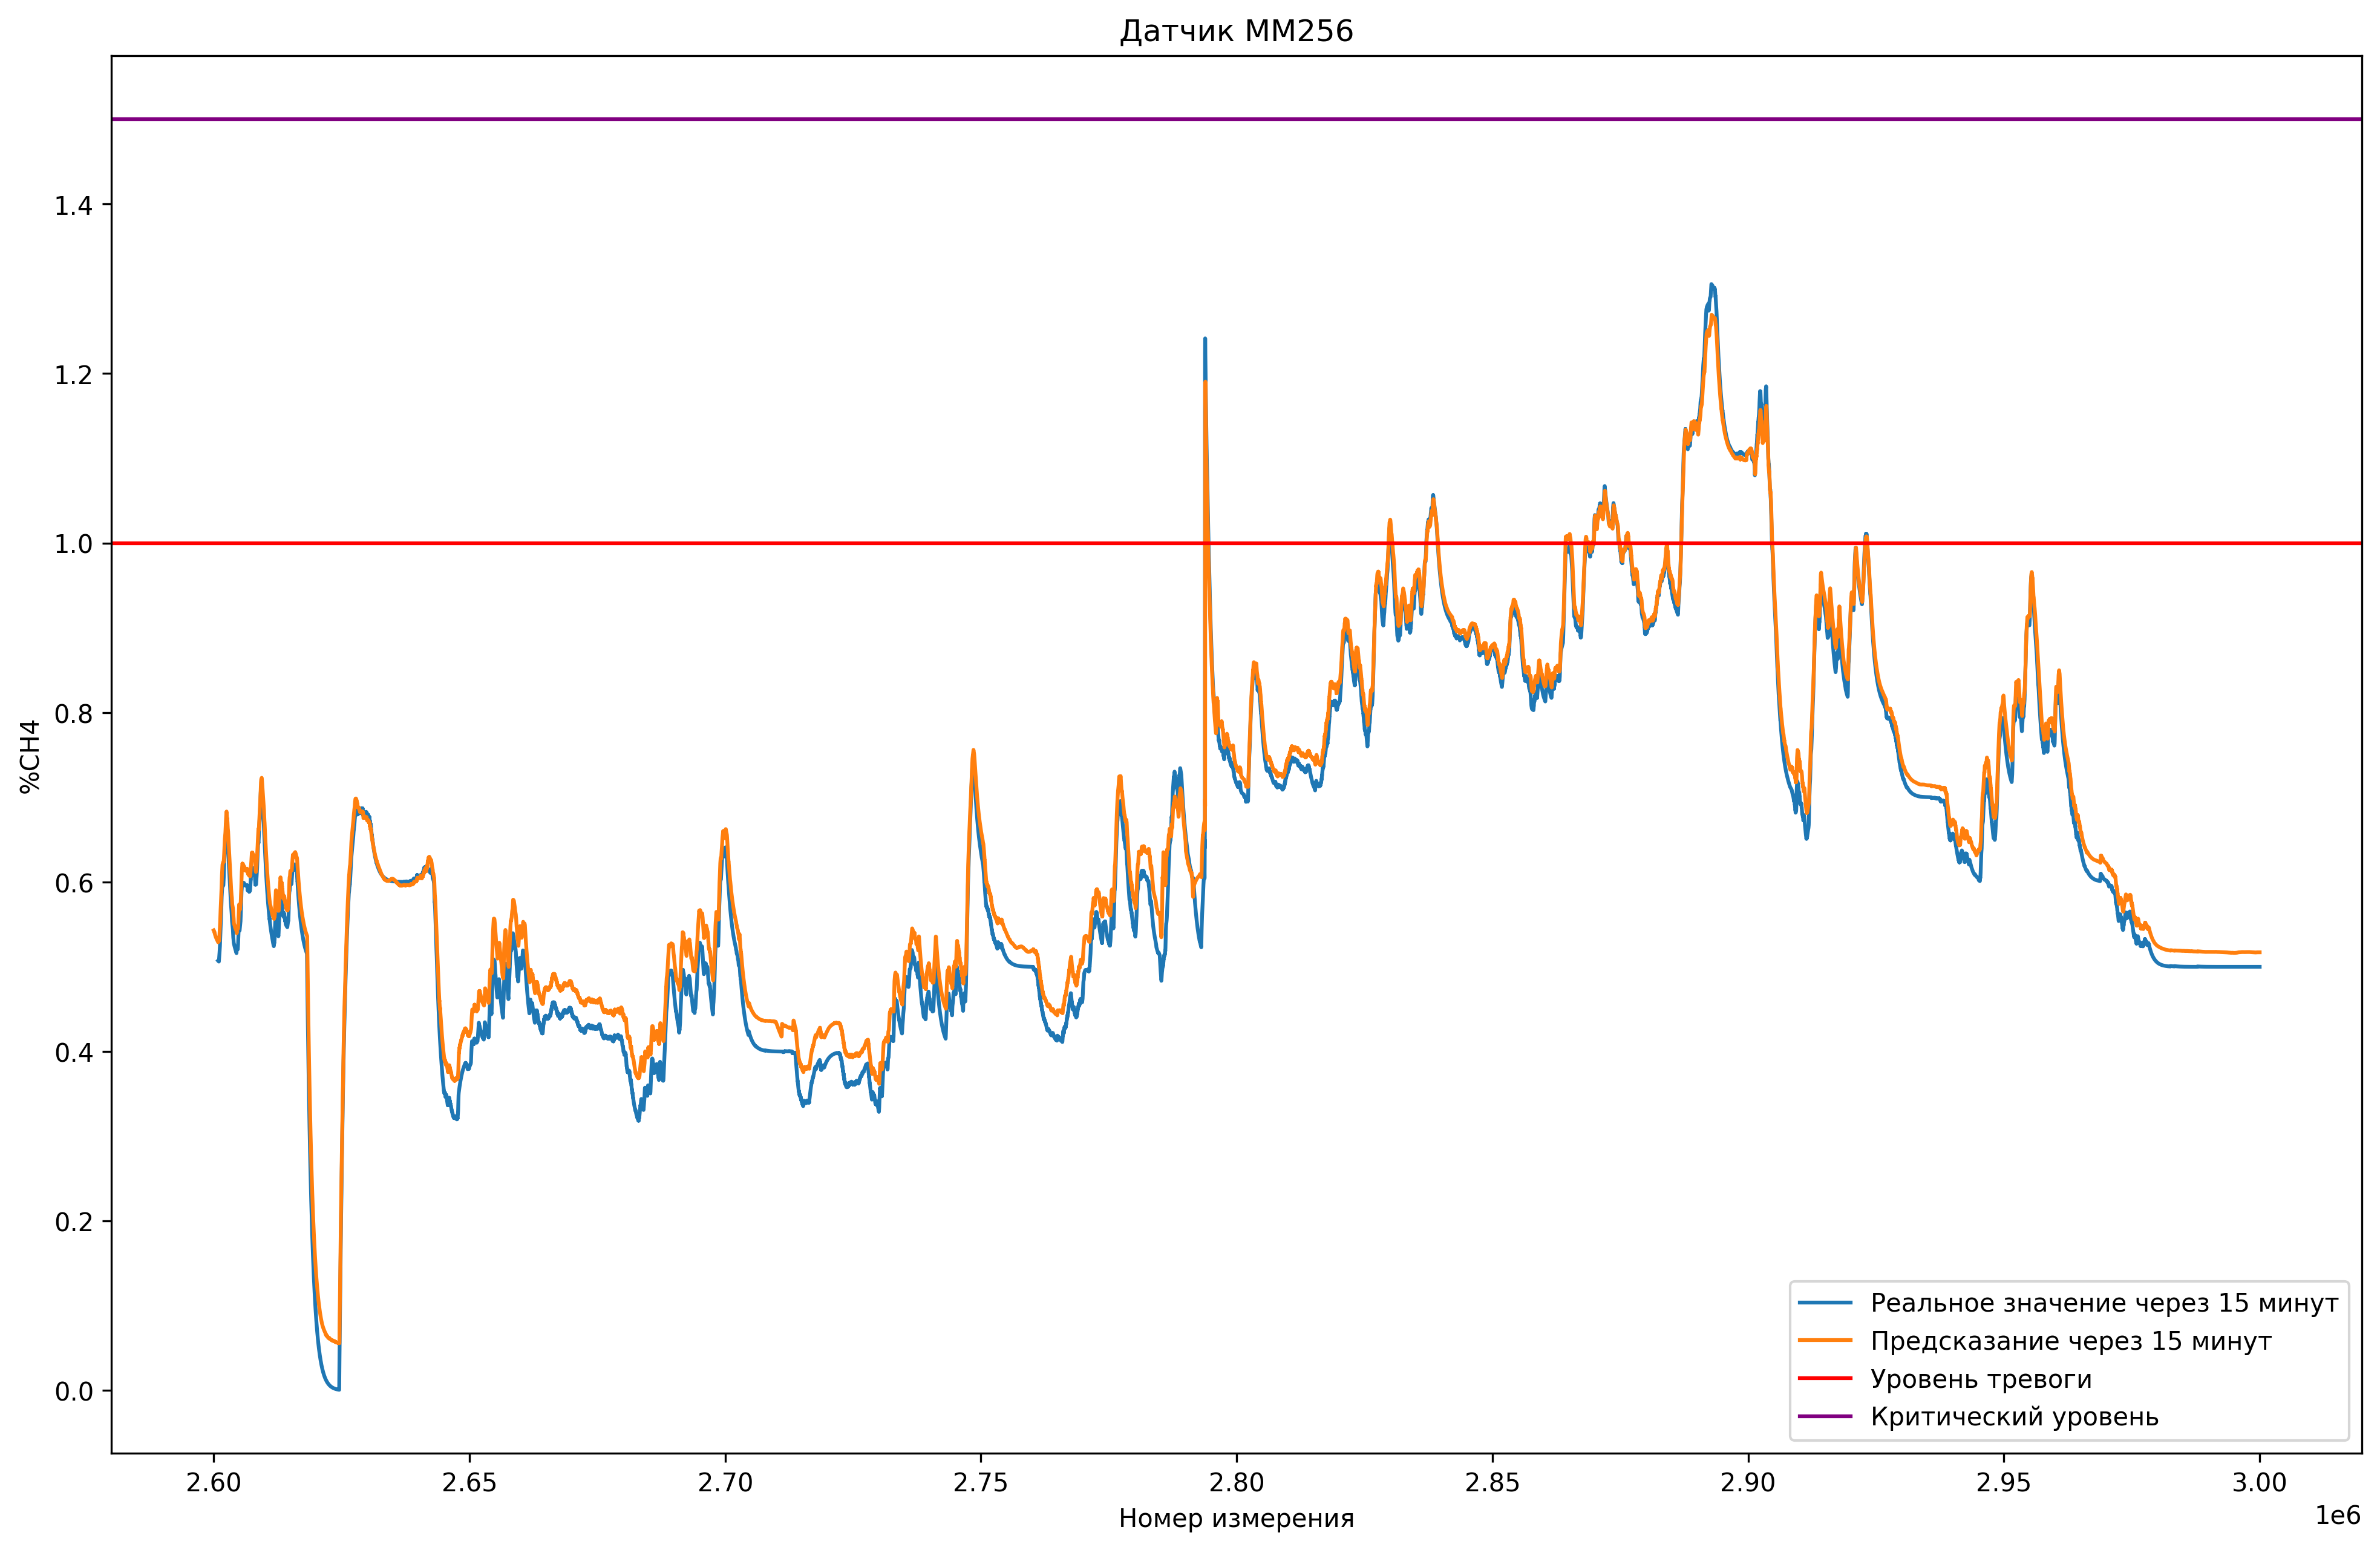

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(target_MM256.iloc[2_600_000:3_000_000])
plt.plot(predictions_MM256.iloc[2_600_000:3_000_000])

plt.axhline(y = 1, color = 'red', label = 'Warning')
plt.axhline(y = 1.5, color = 'purple', label = 'Alarm')

plt.title("Датчик MM256")
plt.ylabel("%CH4")
plt.xlabel("Номер измерения")
plt.legend(["Реальное значение через 15 минут", "Предсказание через 15 минут", "Уровень тревоги", "Критический уровень"], loc='lower right')
plt.savefig('MM256_1.png')

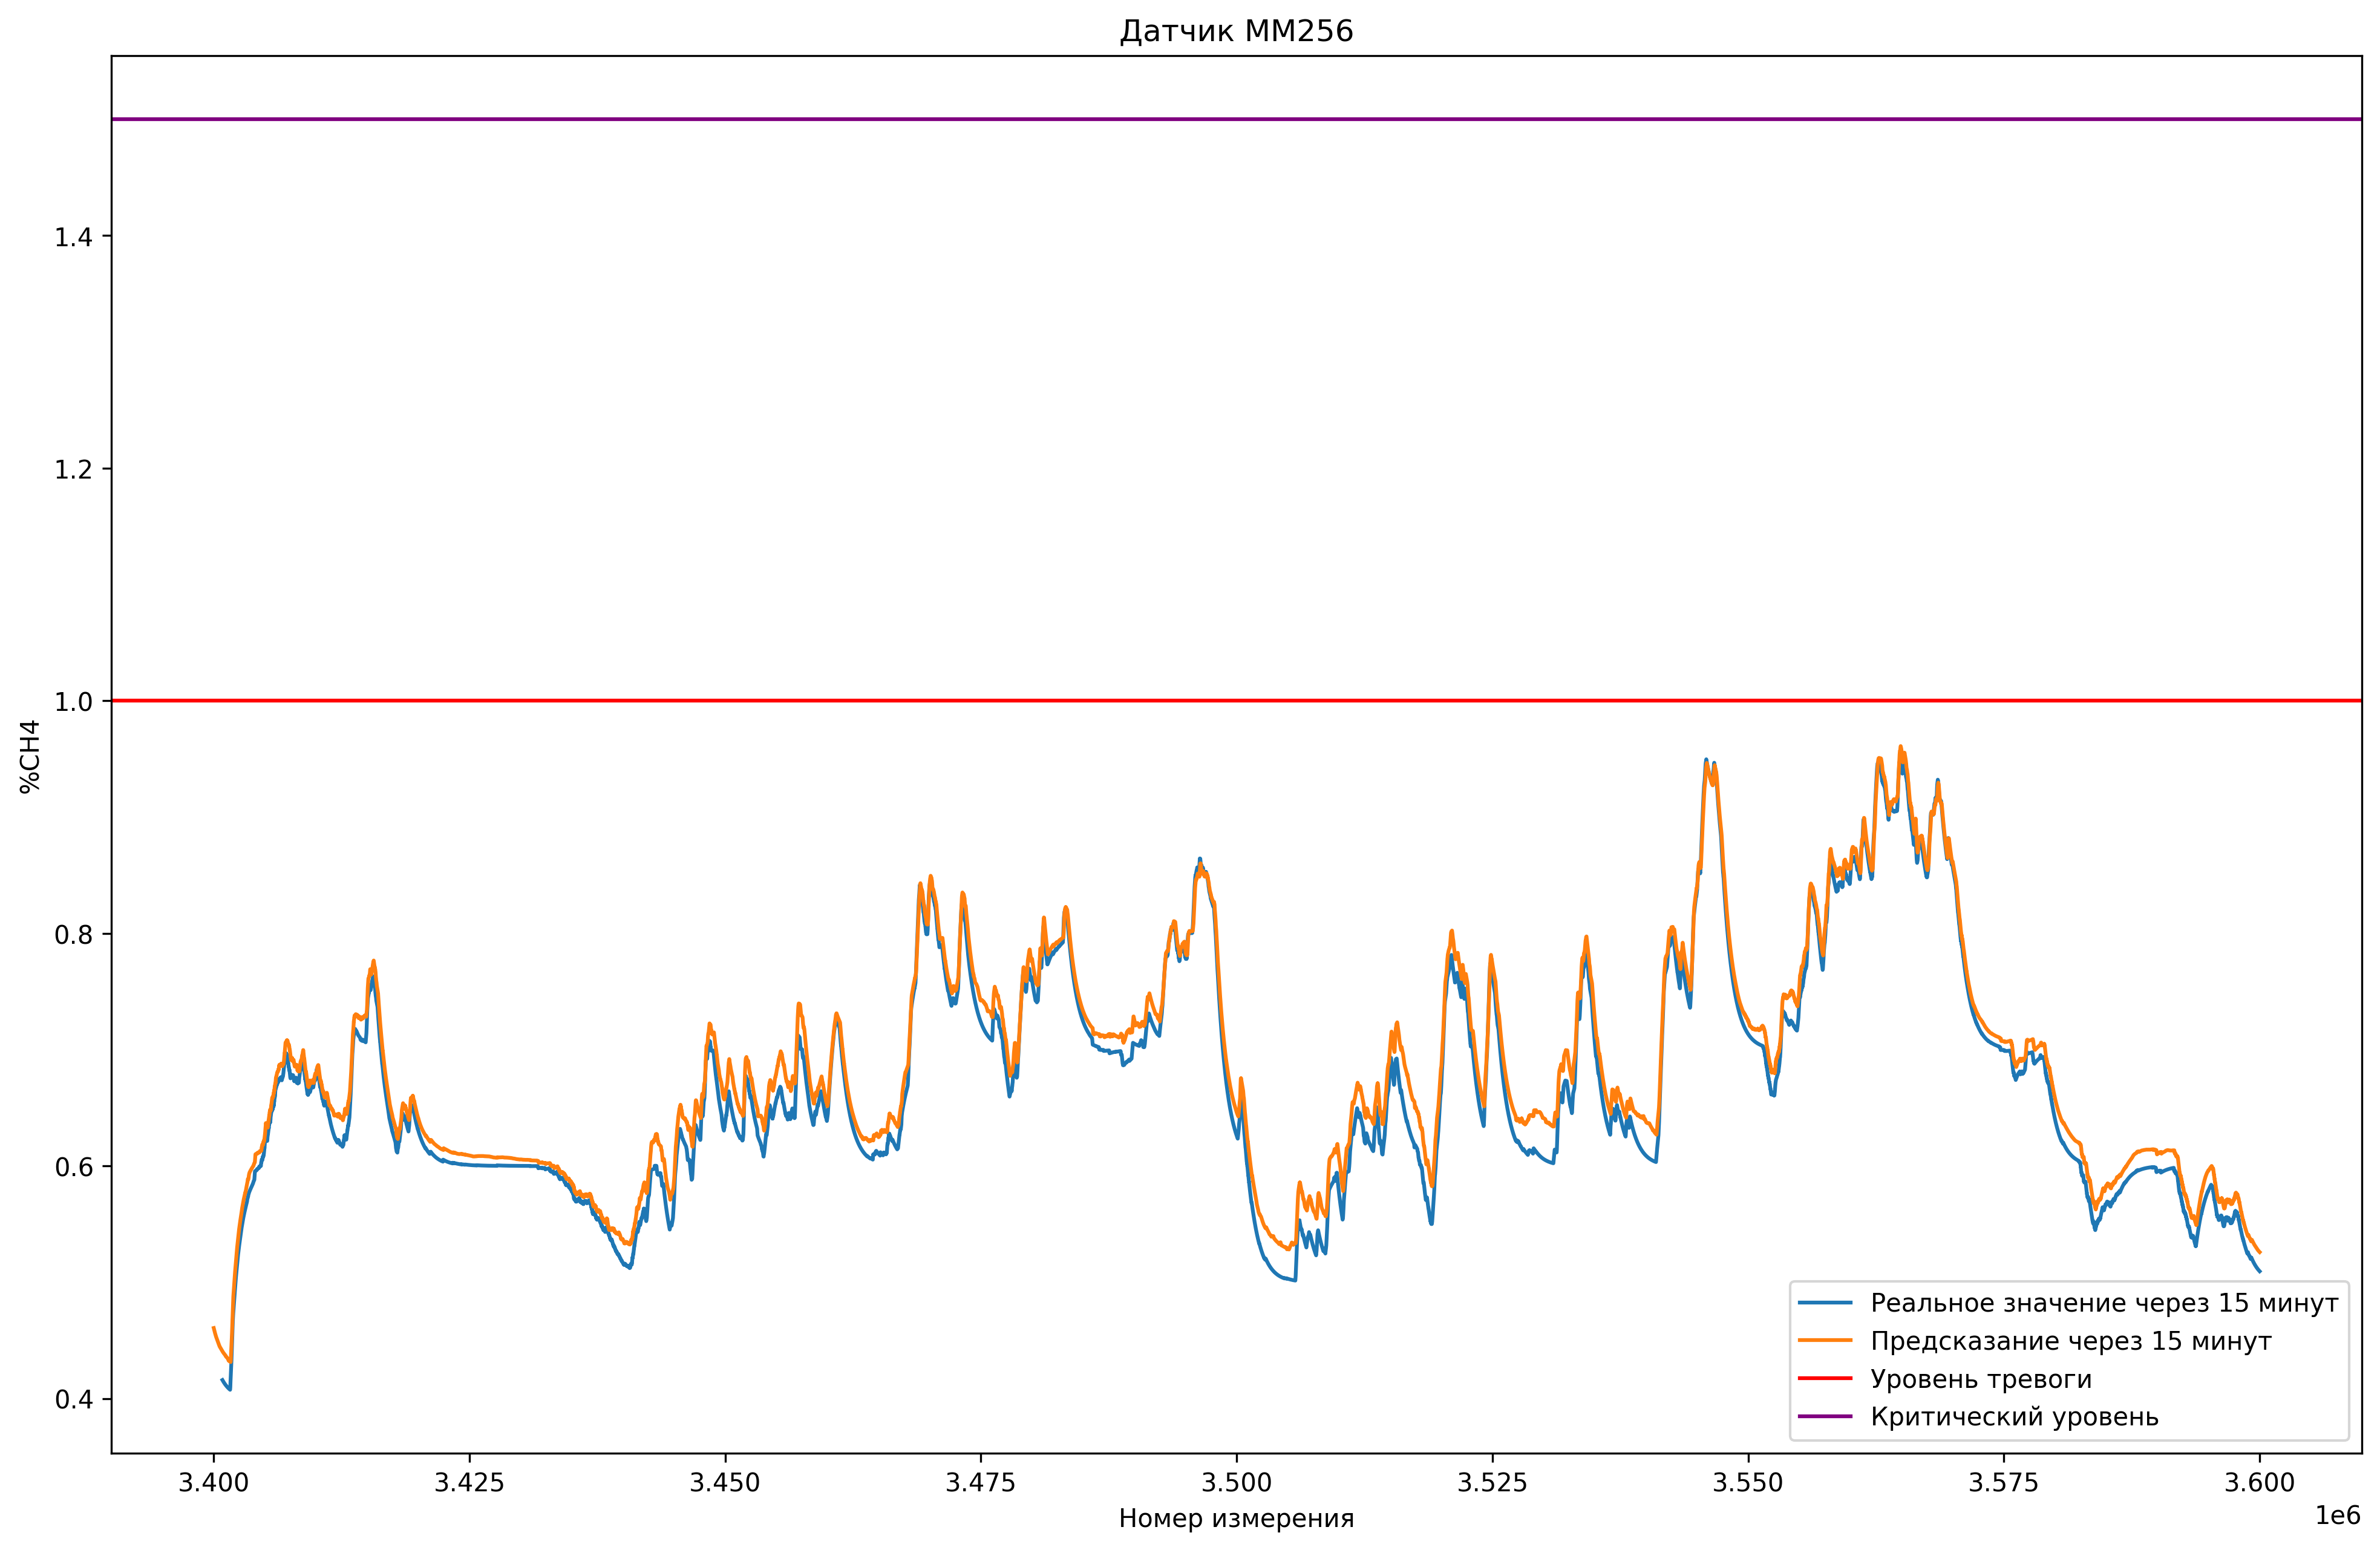

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(target_MM256.iloc[3_400_000:3_600_000])
plt.plot(predictions_MM256.iloc[3_400_000:3_600_000])

plt.axhline(y = 1, color = 'red', label = 'Warning')
plt.axhline(y = 1.5, color = 'purple', label = 'Alarm')

plt.title("Датчик MM256")
plt.ylabel("%CH4")
plt.xlabel("Номер измерения")
plt.legend(["Реальное значение через 15 минут", "Предсказание через 15 минут", "Уровень тревоги", "Критический уровень"], loc='lower right')
plt.savefig('MM256_2.png')

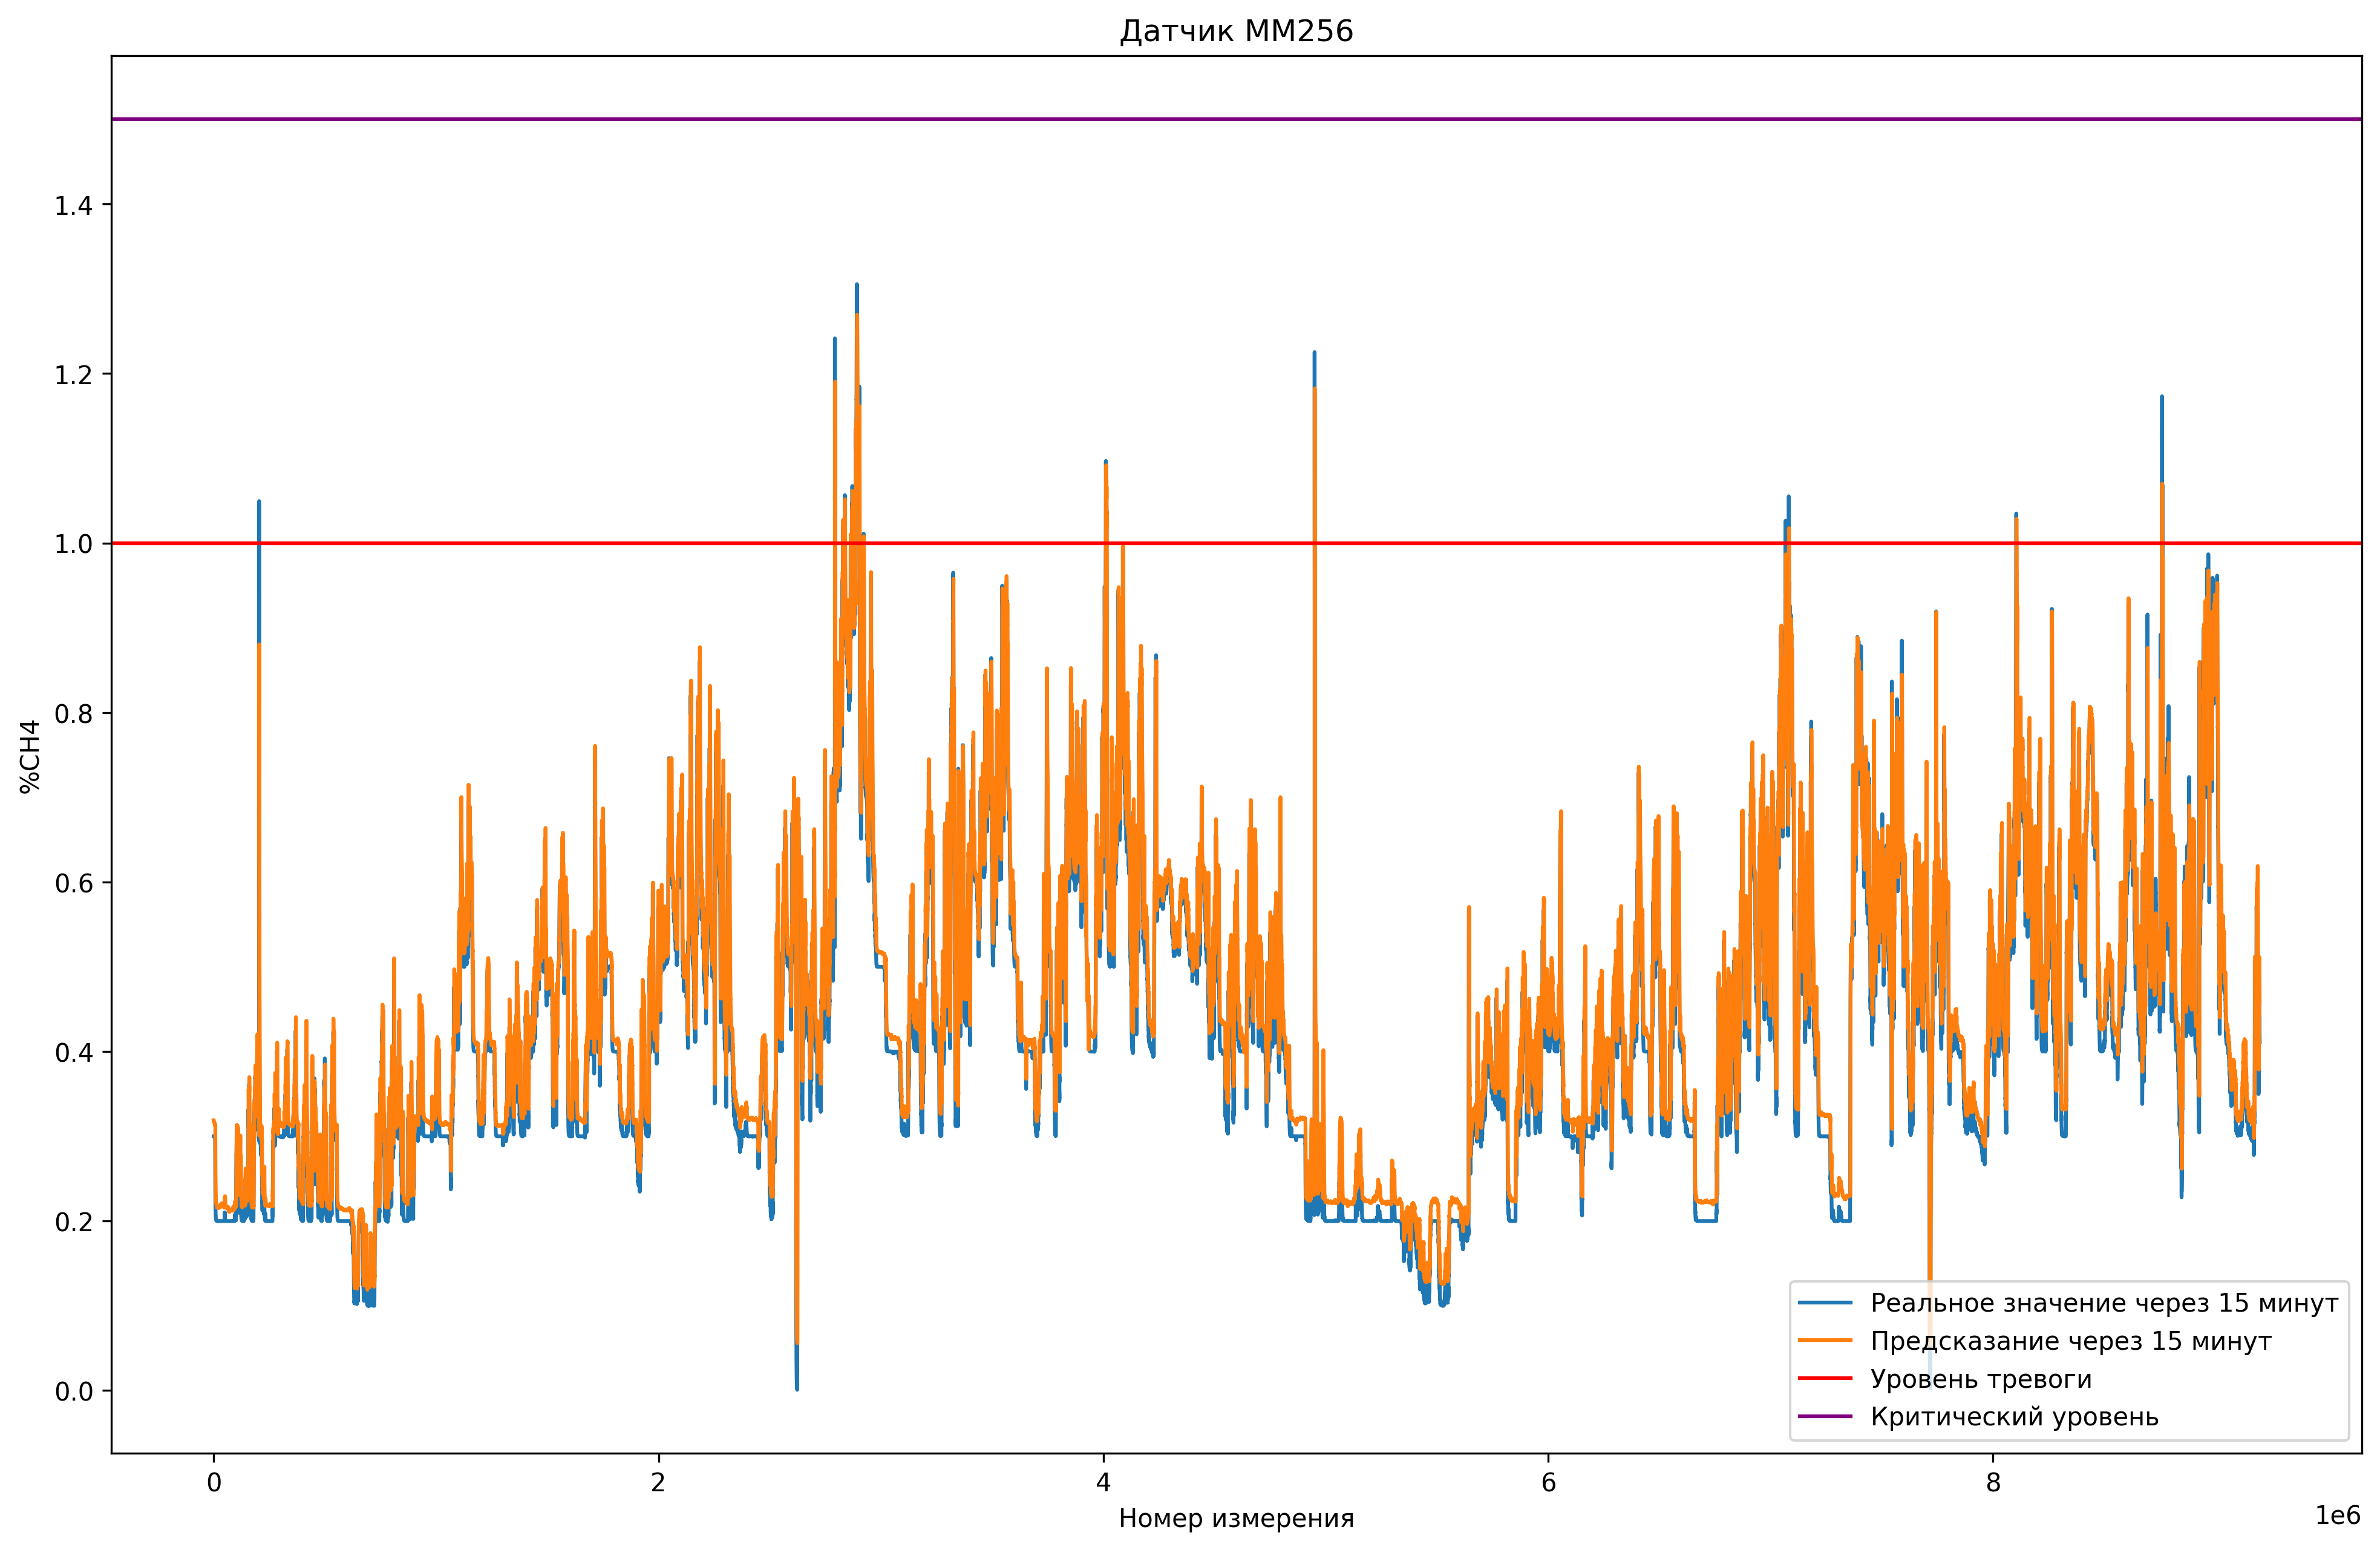

In [ ]:
plt.figure(figsize=(16, 10), dpi=300)
plt.plot(target_MM256)
plt.plot(predictions_MM256)

plt.axhline(y = 1, color = 'red', label = 'Warning')
plt.axhline(y = 1.5, color = 'purple', label = 'Alarm')

plt.title("Датчик MM256")
plt.ylabel("%CH4")
plt.xlabel("Номер измерения")
plt.legend(["Реальное значение через 15 минут", "Предсказание через 15 минут", "Уровень тревоги", "Критический уровень"], loc='lower right')
plt.savefig('MM256_total.png')